In [1]:
install.packages('DT')
install.packages("bigrquery")

also installing the dependencies ‘lazyeval’, ‘crosstalk’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘rapidjsonr’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# install.packages("plotly")

In [3]:
library(tidyverse)
library(DBI)
library(stringr)
library(DT)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
# library(plotly)

In [26]:
con <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra" ,
  dataset = "mart_gtfs" #,
#  billing = "billing"
  )

In [5]:
NS_None = read_csv("../fs_kit/data/NS None Route.csv")

Rows: 3833 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): Bus
date (1): Date
time (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
head(NS_None)

Date       Time     Bus 
1 2024-11-01 14:27:00 3902
2 2024-11-01 14:27:00 3902
3 2024-11-01 14:39:00 3902
4 2024-11-01 14:40:00 3902
5 2024-11-01 14:45:00 3902
6 2024-11-01 14:56:00 3902

In [7]:
dim(NS_None)

[1] 3833    3

### Analyzing with SolTrans Vehicle Positoin messages for November 

In [13]:
dbGetQuery(con, "SELECT * FROM dim_contracts LIMIT 5")

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [18]:
querySolTransVP = "
SELECT 
  datetime(_extract_ts, 'America/Los_Angeles') extract_ts_pasific, 
  vehicle_label Bus,
  trip_id,
  schedule_gtfs_dataset_key,
  service_date  

from `cal-itp-data-infra.mart_gtfs.fct_vehicle_positions_messages` vpm
where gtfs_dataset_name like 'SolTrans%'
and dt between '2024-11-01' and '2024-12-01'
and date(datetime(_extract_ts, 'America/Los_Angeles')) between '2024-11-01' and '2024-11-30'
"
SolTransVP = dbGetQuery(con, querySolTransVP)
SolTransVP %>% 
    saveRDS("../fs_kit/data/SolTransVP.rds")


ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [10]:
library(bigrquery)
bq_auth()

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [22]:
gargle::gargle_oauth_cache()

[1] FALSE

In [23]:
bq_auth(use_gservice_account = FALSE, use_oob = FALSE)

ERROR: Error in bq_auth(use_gservice_account = FALSE, use_oob = FALSE): unused argument (use_gservice_account = FALSE)


In [24]:
bq_auth(path = gargle::credentials_gcloud())

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [25]:
bq_deauth()

In [26]:
gargle::gargle_oauth_sitrep()

ℹ Reporting the default cache location.

No gargle OAuth cache found at ~/.cache/gargle.



In [27]:
bq_auth(cache = ".secrets")

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [28]:
bq_auth(path = gargle::credentials_app_default())


ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [29]:
bq_auth()

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [30]:
file.exists("~/.config/gcloud/application_default_credentials.json")

[1] TRUE

In [31]:
bq_auth(path = "~/.config/gcloud/application_default_credentials.json")

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [34]:
Sys.getenv("GOOGLE_APPLICATION_CREDENTIALS")


[1] "~/.config/gcloud/application_default_credentials.json"

In [33]:
Sys.setenv(GOOGLE_APPLICATION_CREDENTIALS = "~/.config/gcloud/application_default_credentials.json")


In [35]:
bq_auth()

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [36]:
bq_user()


NULL

In [2]:
adc_path <- path.expand("~/.config/gcloud/application_default_credentials.json")
print(adc_path)
Sys.setenv(GOOGLE_APPLICATION_CREDENTIALS = adc_path)


[1] "/home/jovyan/.config/gcloud/application_default_credentials.json"


In [38]:
bq_auth()

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [39]:
bq_auth(path = adc_path)


ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [3]:
Sys.setenv(GOOGLE_APPLICATION_CREDENTIALS = adc_path)
library(bigrquery)
bq_auth()


ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [4]:
adc_path <- path.expand("~/.config/gcloud/application_default_credentials.json")
Sys.setenv(GOOGLE_APPLICATION_CREDENTIALS = adc_path)

library(bigrquery)
bq_auth()


ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [5]:
bq_auth(path = adc_path)


ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [6]:
library(gargle)
gargle::token_fetch(gargle::credentials_app_default())


NULL

In [11]:
library(httr)
library(bigrquery)

In [12]:
# Replace this with the actual token from the terminal
access_token <- "ya29.d.s0AQhWegwNFAPHRtKWdXQB2vd3ImY8y0Qo4QNkXyOPxztWzZuJUkBRy1U2B_88c_2RdUjtvp6kkUxkUHRj-xgeIIel7YB6FBadK8WCaqA1_kI9eRiJUR-GF2aJC8gDv3CDt02SIboAF8cytlT5NNWIraadvrnRBKZ5Gz7DdTZFsghDH1ogh_wuC_rF5S8hC6cM5mxxNBw2NQhaCO35CJpFFeHPuM6f0AyeusZCSN0-JxsTNu8-YmB6xdimVvA5CR0j5qZitT3NGjPkcloOw-bC34GrRY_NVmlWHPlX9lnu0UyiZS29JMjKtUwcWEXOlsqu"  # your printed token goes here

In [13]:
dummy_app <- oauth_app("dummy", key = "", secret = "")

In [14]:
token <- Token2.0$new(
  app = dummy_app,
  endpoint = oauth_endpoints("google"),
  credentials = list(access_token = access_token),
  params = list(as_header = TRUE)
)


In [16]:
# Authenticate using this token
bq_auth(token = token)

In [17]:
# Test it
bq_user()

ERROR: [1m[33mError[39m in `token_userinfo()`:[22m
[1m[22m[33m![39m Client error: (401) Unauthorized
[36m•[39m invalid_request
[36m•[39m Invalid Credentials


In [18]:
Sys.getenv("GOOGLE_APPLICATION_CREDENTIALS")


[1] "/home/jovyan/.config/gcloud/application_default_credentials.json"

In [19]:
library(bigrquery)
bq_auth()


ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [20]:
library(bigrquery)
bq_auth(path = "/home/jovyan/.config/gcloud/application_default_credentials.json")


ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [30]:
con1 <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra-staging" ,
  dataset = "staging_mart_transit_database" #,
#  billing = "billing"
  )

In [31]:
query = "
SELECT * FROM `cal-itp-data-infra-staging.staging_mart_transit_database.dim_products`
"

In [32]:
dbGetQuery(con1, query)


ERROR: [1m[33mError[39m in `bq_post()`:[22m
[1m[22m[33m![39m Request had invalid authentication credentials. Expected OAuth 2
  access token, login cookie or other valid authentication credential. See
  https://developers.google.com/identity/sign-in/web/devconsole-project.
  [authError]


In [33]:
con1 <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra-staging", # Project owning the data
  dataset = "staging_mart_transit_database",
  billing = "cal-itp-data-infra-staging" # Or the actual billing project if different
)

query = "
SELECT * FROM `cal-itp-data-infra-staging.staging_mart_transit_database.dim_products`
"
dbGetQuery(con1, query)

ERROR: [1m[33mError[39m in `bq_post()`:[22m
[1m[22m[33m![39m Request had invalid authentication credentials. Expected OAuth 2
  access token, login cookie or other valid authentication credential. See
  https://developers.google.com/identity/sign-in/web/devconsole-project.
  [authError]


In [34]:
library(bigrquery)

bq_auth(use_oob = TRUE) # Follow the prompts in your console

con1 <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra-staging",
  dataset = "staging_mart_transit_database"
)

query = "
SELECT * FROM `cal-itp-data-infra-staging.staging_mart_transit_database.dim_products`
"
dbGetQuery(con1, query)

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [35]:
bq_auth(use_oob = TRUE) # Follow the prompts in your console

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [36]:
bq_auth(use_oob = TRUE)

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [37]:
Sys.getenv("GOOGLE_APPLICATION_CREDENTIALS")


[1] "/home/jovyan/.config/gcloud/application_default_credentials.json"

In [1]:
con1 <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra-staging",
  dataset = "staging_mart_transit_database",
  billing = "cal-itp-data-infra-staging" # Keep the billing project explicit
)

query = "
SELECT * FROM `cal-itp-data-infra-staging.staging_mart_transit_database.dim_products`
"
dbGetQuery(con1, query)

ERROR: Error in dbConnect(bigrquery::bigquery(), project = "cal-itp-data-infra-staging", : could not find function "dbConnect"


In [2]:
library(DBI)
library(bigrquery)

con1 <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra-staging",
  dataset = "staging_mart_transit_database",
  billing = "cal-itp-data-infra-staging"
)

query = "
SELECT * FROM `cal-itp-data-infra-staging.staging_mart_transit_database.dim_products`
"
dbGetQuery(con1, query)

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [3]:
library(DBI)
library(bigrquery)

# Explicitly authenticate using the existing token (if found)
bq_auth(token = bq_token())

con1 <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra-staging",
  dataset = "staging_mart_transit_database",
  billing = "cal-itp-data-infra-staging"
)

query = "
SELECT * FROM `cal-itp-data-infra-staging.staging_mart_transit_database.dim_products`
"
dbGetQuery(con1, query)

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [4]:
library(DBI)
library(bigrquery)

# Explicitly set the path to the ADC file
bq_auth(path = "/home/jovyan/.config/gcloud/application_default_credentials.json")

con1 <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra-staging",
  dataset = "staging_mart_transit_database",
  billing = "cal-itp-data-infra-staging"
)

query = "
SELECT * FROM `cal-itp-data-infra-staging.staging_mart_transit_database.dim_products`
"
dbGetQuery(con1, query)

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [5]:
library(DBI)
library(bigrquery)

# Get the access token using a system command
access_token <- system("gcloud auth application-default print-access-token", intern = TRUE)

# Authenticate bigrquery with the access token
bq_auth(token = access_token)

con1 <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra-staging",
  dataset = "staging_mart_transit_database",
  billing = "cal-itp-data-infra-staging"
)

query = "
SELECT * FROM `cal-itp-data-infra-staging.staging_mart_transit_database.dim_products`
"
dbGetQuery(con1, query)

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [6]:
install.packages("bigrquery")
install.packages("DBI")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [7]:
library(DBI)
library(bigrquery)

access_token <- system("gcloud auth application-default print-access-token", intern = TRUE)

Sys.setenv("BIGQUERY_TOKEN" = access_token)

con1 <- dbConnect(
  bigrquery::bigquery(),
  project = "cal-itp-data-infra-staging",
  dataset = "staging_mart_transit_database",
  billing = "cal-itp-data-infra-staging"
)

query = "
SELECT * FROM `cal-itp-data-infra-staging.staging_mart_transit_database.dim_products`
"
dbGetQuery(con1, query)

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [8]:
library(bigrquery)

access_token <- system("gcloud auth application-default print-access-token", intern = TRUE)
bq_auth(token = access_token)

tryCatch({
  result <- bq_table_metadata("cal-itp-data-infra-staging", "staging_mart_transit_database.dim_products")
  print(result)
}, error = function(e) {
  cat("Error with bq_table_metadata:", conditionMessage(e), "\n")
})

ERROR: [1m[33mError[39m in `bq_auth()`:[22m
[1m[22m[33m![39m Can't get Google credentials.
[36mℹ[39m Try calling `bq_auth()` directly with necessary specifics.


In [8]:
SolTransVP = readRDS("../fs_kit/data/SolTransVP.rds")

In [9]:
SolTransVP = SolTransVP %>% 
    mutate(Date = as.Date(extract_ts_pasific), 
           Time =  format(extract_ts_pasific, format = "%H:%M:%S")) %>% 
    filter(format(extract_ts_pasific, format = "%S") == "00") %>% 
    select(Date, Time, Bus, trip_id)

In [10]:
head(SolTransVP)

Date       Time     Bus  trip_id
1 2024-11-01 04:00:00 5109 NA     
2 2024-11-01 04:01:00 5109 NA     
3 2024-11-01 04:02:00 5109 NA     
4 2024-11-01 04:03:00 5109 NA     
5 2024-11-01 04:04:00 5109 NA     
6 2024-11-01 04:05:00 5109 NA

In [11]:
dim(SolTransVP)

[1] 455246      4

In [12]:
SolTransVP %>% 
    is.na() %>% colSums()

Date    Time     Bus trip_id 
      0       0       0   61526

In [13]:
NS_None = NS_None %>% 
    mutate(Time = format(Time, format = "%H:%M:%S"),
           Bus = as.character(Bus))
head(NS_None)
dim(NS_None)

Date       Time     Bus 
1 2024-11-01 14:27:00 3902
2 2024-11-01 14:27:00 3902
3 2024-11-01 14:39:00 3902
4 2024-11-01 14:40:00 3902
5 2024-11-01 14:45:00 3902
6 2024-11-01 14:56:00 3902

[1] 3833    3

In [14]:
NS_NoneRoute = NS_None %>% 
    left_join(SolTransVP) %>% 
    mutate(Reason = ifelse(is.na(trip_id), "CNX", "Clipper"))
head(NS_NoneRoute)
dim(NS_NoneRoute)

Joining with `by = join_by(Date, Time, Bus)`


Date       Time     Bus  trip_id Reason 
1 2024-11-01 14:27:00 3902 355     Clipper
2 2024-11-01 14:27:00 3902 355     Clipper
3 2024-11-01 14:39:00 3902 356     Clipper
4 2024-11-01 14:40:00 3902 356     Clipper
5 2024-11-01 14:45:00 3902 356     Clipper
6 2024-11-01 14:56:00 3902 356     Clipper

[1] 3833    5

In [15]:
NS_NoneRoute %>% 
    datatable(class = 'cell-border stripe', 
              options = list(pageLength = 20, dom = 'tp'),
              caption = ''
             )


HTML widgets cannot be represented in plain text (need html)

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


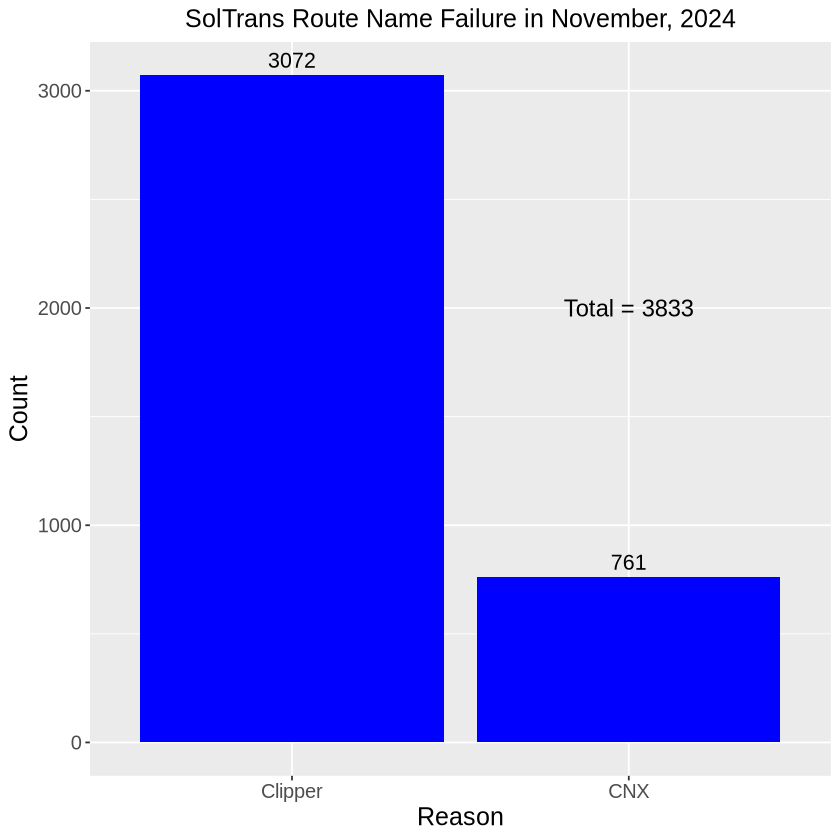

In [16]:
options(repr.plot.width = 7, repr.plot.height =7) 
NS_NoneRoute %>% 
    ggplot(aes(Reason)) +
    geom_bar(fill = "blue") +
    ggtitle("SolTrans Route Name Failure in November, 2024") +
    ylab("Count") +
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    geom_text(
        aes(label=..count..), stat = "count",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) +
    annotate("text", x=2, y=2000, label= paste0("Total = ", nrow(NS_NoneRoute)), size = 5)


In [17]:
X = NS_NoneRoute %>% 
    count(Reason)
X

Reason  n   
1 CNX      761
2 Clipper 3072

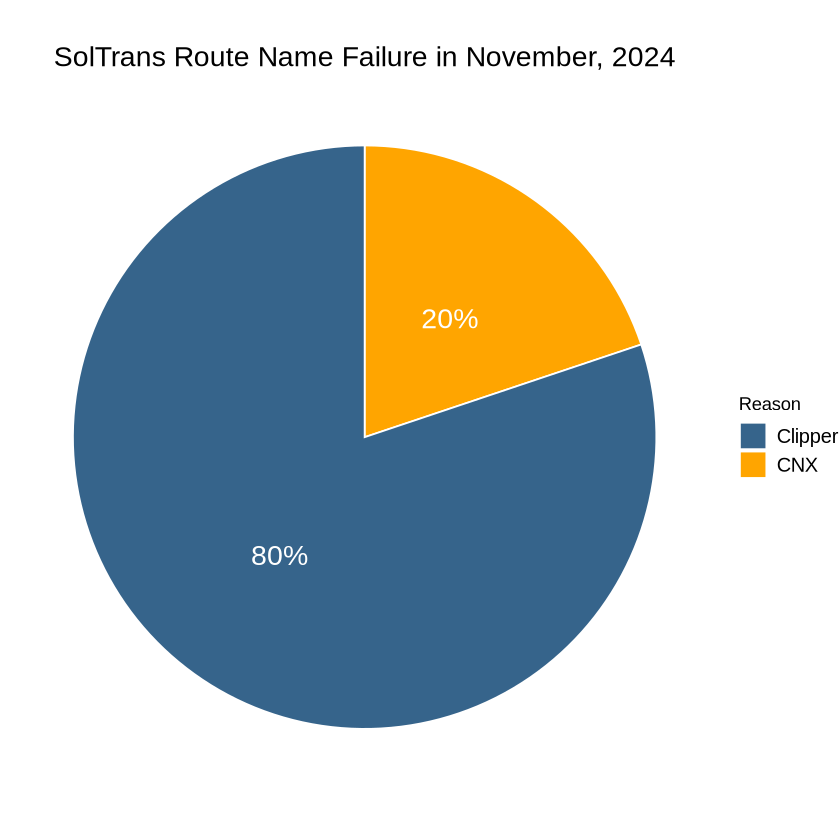

In [18]:
X %>% 
    mutate(prop = n / sum(X$n) *100) %>%
    mutate(ypos = cumsum(prop)- 0.5*prop ) %>% 
    mutate(prop1 = scales::percent(n / sum(X$n))) %>% 
    ggplot(aes(x="", y=prop, fill=Reason)) +
    geom_bar(stat="identity", width=1, color="white") +
    coord_polar("y", start=0) +
    theme_void() + 
    geom_text(aes(y = ypos, label = prop1), color = "white", size=6) +
    scale_fill_manual("Reason", values = c("Clipper" = "steelblue4", "CNX" = "orange")) +
    ggtitle("SolTrans Route Name Failure in November, 2024") +
    theme(plot.title = element_text(hjust = 0.5, size = 17)) +
    theme(legend.text = element_text(size = 12))


### Analyzing with SolTrans Trip Update messages for November 

In [19]:
# querySolTransTU = "
# SELECT 
#   datetime(_extract_ts, 'America/Los_Angeles') extract_ts_pasific, 
#   vehicle_label Bus,
#   trip_id,
#   schedule_gtfs_dataset_key,
#   service_date  

# from `cal-itp-data-infra.mart_gtfs.fct_trip_updates_messages`
# where gtfs_dataset_name like 'SolTrans%'
# and dt between '2024-11-01' and '2024-12-01'
# and date(datetime(_extract_ts, 'America/Los_Angeles')) between '2024-11-01' and '2024-11-30'
# "
# SolTransTU = dbGetQuery(con, querySolTransTU)
# SolTransTU %>% 
#     saveRDS("../fs_kit/data/SolTransTU.rds")


In [20]:
SolTransTU = readRDS("../fs_kit/data/SolTransTU.rds")

In [21]:
head(SolTransTU)
dim(SolTransTU)
summary(SolTransTU)

extract_ts_pasific  Bus  trip_id schedule_gtfs_dataset_key       
1 2024-11-01 03:11:40 5109 87      755bc2b140995ecf1c477d9fa53a34d0
2 2024-11-01 03:12:00 5109 87      755bc2b140995ecf1c477d9fa53a34d0
3 2024-11-01 03:12:20 5109 87      755bc2b140995ecf1c477d9fa53a34d0
4 2024-11-01 03:12:40 5109 87      755bc2b140995ecf1c477d9fa53a34d0
5 2024-11-01 03:13:00 5109 87      755bc2b140995ecf1c477d9fa53a34d0
6 2024-11-01 03:13:20 5109 87      755bc2b140995ecf1c477d9fa53a34d0
  service_date
1 2024-11-01  
2 2024-11-01  
3 2024-11-01  
4 2024-11-01  
5 2024-11-01  
6 2024-11-01

[1] 3085637       5

 extract_ts_pasific                   Bus              trip_id         
 Min.   :2024-11-01 03:11:40.00   Length:3085637     Length:3085637    
 1st Qu.:2024-11-07 18:43:00.00   Class :character   Class :character  
 Median :2024-11-15 10:07:20.00   Mode  :character   Mode  :character  
 Mean   :2024-11-15 12:57:09.30                                        
 3rd Qu.:2024-11-22 08:07:20.00                                        
 Max.   :2024-11-30 22:04:40.00                                        
 schedule_gtfs_dataset_key  service_date       
 Length:3085637            Min.   :2024-11-01  
 Class :character          1st Qu.:2024-11-07  
 Mode  :character          Median :2024-11-15  
                           Mean   :2024-11-14  
                           3rd Qu.:2024-11-22  
                           Max.   :2024-11-30  

In [22]:
SolTransTU %>% 
    is.na() %>% colSums()

extract_ts_pasific                       Bus                   trip_id 
                        0                     33230                         0 
schedule_gtfs_dataset_key              service_date 
                        0                         0

In [23]:
SolTransTU %>% 
    select(-trip_id) %>% 
    distinct() %>% 
    is.na() %>% colSums()

extract_ts_pasific                       Bus schedule_gtfs_dataset_key 
                        0                     21152                         0 
             service_date 
                        0

In [24]:
SolTransTU = SolTransTU %>% 
    mutate(Date = as.Date(extract_ts_pasific), 
           Time =  format(extract_ts_pasific, format = "%H:%M:%S")) %>% 
    filter(format(extract_ts_pasific, format = "%S") == "00") %>% 
    select(Date, Time, Bus, trip_id)

In [25]:
head(SolTransTU)
dim(SolTransTU)

Date       Time     Bus  trip_id
1 2024-11-01 03:12:00 5109 87     
2 2024-11-01 03:13:00 5109 87     
3 2024-11-01 03:14:00 5109 87     
4 2024-11-01 03:15:00 5109 87     
5 2024-11-01 03:16:00 5109 87     
6 2024-11-01 03:17:00 5109 87

[1] 1027853       4

In [26]:
SolTransTU %>% 
    is.na() %>% colSums()

Date    Time     Bus trip_id 
      0       0   11437       0

In [27]:
SolTransTU %>% 
    select(-trip_id) %>% 
    distinct() %>% 
    is.na() %>% colSums()

Date Time  Bus 
   0    0 7312

In [28]:
NS_NoneRouteTU = SolTransTU %>% 
    select(-trip_id) %>% 
    distinct() %>% 
    mutate(Reason = "Clipper") %>% 
    right_join(NS_None) %>% 
    replace_na(list(Reason = "CNX")) 
head(NS_NoneRouteTU) 
dim(NS_NoneRouteTU)

Joining with `by = join_by(Date, Time, Bus)`


Date       Time     Bus  Reason 
1 2024-11-25 05:12:00 5113 Clipper
2 2024-11-25 05:12:00 5113 Clipper
3 2024-11-25 05:12:00 5113 Clipper
4 2024-11-25 05:12:00 5113 Clipper
5 2024-11-25 05:12:00 5113 Clipper
6 2024-11-25 05:12:00 5113 Clipper

[1] 3833    4

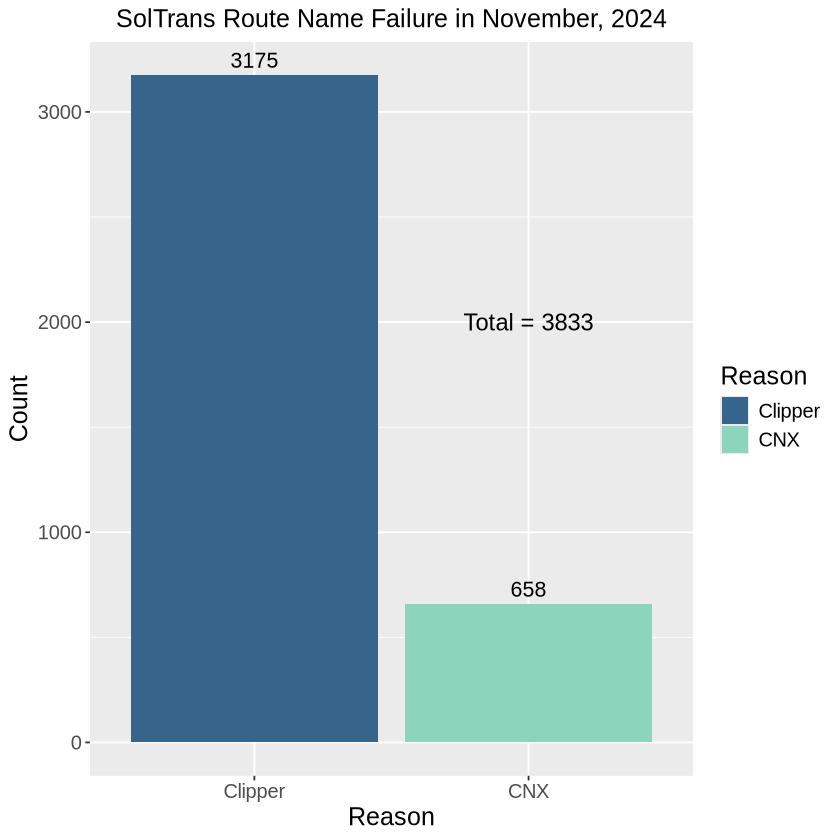

In [29]:
options(repr.plot.width = 7, repr.plot.height =7) 
NS_NoneRouteTU %>% 
    ggplot(aes(x = Reason, fill = Reason)) +
    geom_bar() +
    ggtitle("SolTrans Route Name Failure in November, 2024") +
    ylab("Count") +
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    geom_text(
        aes(label=..count..), stat = "count",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) +
    scale_fill_manual("Reason", values = c("Clipper" = "steelblue4", "CNX" = "#8dd4bd")) +
    annotate("text", x=2, y=2000, label= paste0("Total = ", nrow(NS_NoneRouteTU)), size = 5)


In [30]:
X = NS_NoneRouteTU %>% 
    count(Reason)
X

Reason  n   
1 CNX      658
2 Clipper 3175

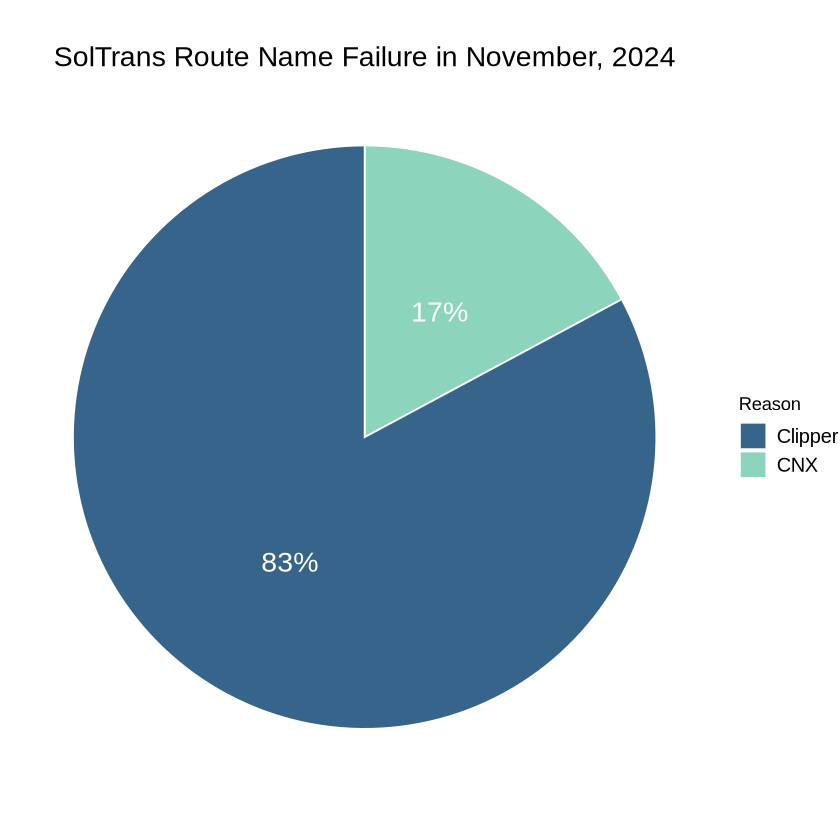

In [31]:
X %>% 
    mutate(prop = n / sum(X$n) *100) %>%
    mutate(ypos = cumsum(prop)- 0.5*prop ) %>% 
    mutate(prop1 = scales::percent(n / sum(X$n))) %>% 
    ggplot(aes(x="", y=prop, fill=Reason)) +
    geom_bar(stat="identity", width=1, color="white") +
    coord_polar("y", start=0) +
    theme_void() + 
    geom_text(aes(y = ypos, label = prop1), color = "white", size=6) +
    scale_fill_manual("Reason", values = c("Clipper" = "steelblue4", "CNX" = "#8dd4bd")) +
    ggtitle("SolTrans Route Name Failure in November, 2024") +
    theme(plot.title = element_text(hjust = 0.5, size = 17)) +
    theme(legend.text = element_text(size = 12))


### Overall Route Name Failure 

#### Reading in the Bus file

In [32]:
Bus =  read_csv("../fs_kit/data/Bus.csv") %>% 
    mutate(Bus = as.character(Bus))
head(Bus)

Rows: 40 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): Bus, deviceSerialNumber

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Bus  deviceSerialNumber
1 3901 7805858           
2 3902 7805811           
3 3904 7805807           
4 3905 7805842           
5 3906 7805838           
6 3908 7805862

#### Reading in the November XML file

In [33]:
SolTransNov = read_csv("../fs_kit/data/20241100009.000000.csv", col_select = c(
  operatorId,
  deviceSerialNumber,
  routeId,
  PST,
  recordType,
  fareTransactionSubType,
  contractId,
  productCategory,
  purseAmount,
  purseBalance,
  fareCategory,
  transferOperator,
  transferDiscountFlag,
  fareDiscount,
  deviceEventTransactionSubType,
  eventCode1,
  eventCode16,
  Description,
  routeId29)
)

Rows: 90821 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): PST, Description
dbl (17): operatorId, deviceSerialNumber, routeId, recordType, fareTransacti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [34]:
head(SolTransNov)

operatorId deviceSerialNumber routeId PST              recordType
1 9          7806110            771     10/16/2024 8:51  6         
2 9          7806110            771     10/16/2024 8:51  6         
3 9          7806110            771     10/16/2024 8:51  6         
4 9          7806112            771     10/22/2024 13:44 6         
5 9          7806454              0     10/23/2024 6:08  6         
6 9          7806454            834     10/23/2024 6:08  6         
  fareTransactionSubType contractId productCategory purseAmount purseBalance
1 NA                     NA         NA              NA          NA          
2 NA                     NA         NA              NA          NA          
3 NA                     NA         NA              NA          NA          
4 NA                     NA         NA              NA          NA          
5 NA                     NA         NA              NA          NA          
6 NA                     NA         NA              NA          NA          
  fareCategory transferOperator transferDiscountFlag fareDiscount
1 NA           NA               NA                   NA          
2 NA           NA               NA                   NA          
3 NA           NA               NA                   NA          
4 NA           NA               NA                   NA          
5 NA           NA               NA                   NA          
6 NA           NA               NA                   NA          
  deviceEventTransactionSubType eventCode1 eventCode16 Description routeId29
1 16                            NA         29          NA           NA      
2 16                            NA         18          NA           NA      
3  1                             0         NA          NA           NA      
4  1                             1         NA          NA           NA      
5 16                            NA          5          NA            0      
6 16                            NA          5          NA          834

In [35]:
SolTransNov = SolTransNov %>% 
    mutate(PST = mdy_hm(PST), 
           Date = as.Date(PST),
           Time = format(PST, format = "%H:%M:%S")) %>% 
     filter(operatorId == 9,
           Date >= "2024-11-01",
           deviceSerialNumber > 7805802,
           deviceSerialNumber < 7805874)
head(SolTransNov)

operatorId deviceSerialNumber routeId PST                 recordType
1 9          7805822            420     2024-11-01 00:01:00 6         
2 9          7805822            420     2024-11-01 00:01:00 6         
3 9          7805818            835     2024-11-01 02:07:00 6         
4 9          7805818            835     2024-11-01 02:07:00 6         
5 9          7805818            835     2024-11-01 02:07:00 6         
6 9          7805818            835     2024-11-01 02:07:00 6         
  fareTransactionSubType contractId productCategory purseAmount purseBalance ⋯
1 NA                     NA         NA              NA          NA           ⋯
2 NA                     NA         NA              NA          NA           ⋯
3 NA                     NA         NA              NA          NA           ⋯
4 NA                     NA         NA              NA          NA           ⋯
5 NA                     NA         NA              NA          NA           ⋯
6 NA                     NA         NA              NA          NA           ⋯
  transferOperator transferDiscountFlag fareDiscount
1 NA               NA                   NA          
2 NA               NA                   NA          
3 NA               NA                   NA          
4 NA               NA                   NA          
5 NA               NA                   NA          
6 NA               NA                   NA          
  deviceEventTransactionSubType eventCode1 eventCode16 Description           
1 16                            NA         22          EV_CD_PACKAGE_RECEIVED
2  1                            21         NA          EV_CONFIG_DATA_CHANGE 
3 16                            NA         29          EV_CD_DOWNLOAD_STATUS 
4 16                            NA         18          EV_APP_VERSIONS       
5  1                             0         NA          EV_IN_SERVICE         
6 16                            NA         22          EV_CD_PACKAGE_RECEIVED
  routeId29 Date       Time    
1 NA        2024-11-01 00:01:00
2 NA        2024-11-01 00:01:00
3 NA        2024-11-01 02:07:00
4 NA        2024-11-01 02:07:00
5 NA        2024-11-01 02:07:00
6 NA        2024-11-01 02:07:00

In [36]:
dim(SolTransNov)

[1] 43205    21

In [37]:
X = SolTransNov

In [38]:
A = Bus %>% 
    distinct(deviceSerialNumber)  
dim(A)

[1] 40  1

In [39]:
B = SolTransNov %>%
    filter(recordType == 1) %>% 
    distinct(deviceSerialNumber)
dim(B)

[1] 36  1

In [40]:
B %>% 
    anti_join(A)

Joining with `by = join_by(deviceSerialNumber)`


deviceSerialNumber

In [41]:
A %>% 
    anti_join(B)

Joining with `by = join_by(deviceSerialNumber)`


deviceSerialNumber
1 7805861           
2 7805839           
3 7805831           
4 7805872

In [42]:
SolTransNov = SolTransNov %>% 
    inner_join(Bus) 
dim(SolTransNov)

Joining with `by = join_by(deviceSerialNumber)`


[1] 43000    22

In [43]:
X %>% 
    anti_join(SolTransNov %>% 
                 select(-Bus))  %>% 
    distinct(recordType)

Joining with `by = join_by(operatorId, deviceSerialNumber, routeId, PST,
recordType, fareTransactionSubType, contractId, productCategory, purseAmount,
purseBalance, fareCategory, transferOperator, transferDiscountFlag,
fareDiscount, deviceEventTransactionSubType, eventCode1, eventCode16,
Description, routeId29, Date, Time)`


recordType
1 6

In [44]:
SolTransNovFare = SolTransNov %>% 
    filter(recordType == 1) %>% 
    mutate(Route = ifelse(routeId == 835, "Invalid", "Valid")) %>% 
    select(Date, Time, Bus, Route)
head(SolTransNovFare)
dim(SolTransNovFare)

Date       Time     Bus  Route
1 2024-11-01 02:45:00 5105 Valid
2 2024-11-01 02:48:00 5105 Valid
3 2024-11-01 02:49:00 5105 Valid
4 2024-11-01 02:50:00 5105 Valid
5 2024-11-01 02:53:00 5105 Valid
6 2024-11-01 02:55:00 5118 Valid

[1] 22556     4

In [45]:
SolTransNovFare %>% 
    count(Route)

Route   n    
1 Invalid  3780
2 Valid   18776

In [46]:
NS_None %>% head()
NS_None %>% nrow()

Date       Time     Bus 
1 2024-11-01 14:27:00 3902
2 2024-11-01 14:27:00 3902
3 2024-11-01 14:39:00 3902
4 2024-11-01 14:40:00 3902
5 2024-11-01 14:45:00 3902
6 2024-11-01 14:56:00 3902

[1] 3833

In [47]:
NS_NoneRoute %>% head()
NS_NoneRoute %>% nrow()

Date       Time     Bus  trip_id Reason 
1 2024-11-01 14:27:00 3902 355     Clipper
2 2024-11-01 14:27:00 3902 355     Clipper
3 2024-11-01 14:39:00 3902 356     Clipper
4 2024-11-01 14:40:00 3902 356     Clipper
5 2024-11-01 14:45:00 3902 356     Clipper
6 2024-11-01 14:56:00 3902 356     Clipper

[1] 3833

In [48]:
NS_NoneRouteTU %>% head()
NS_NoneRouteTU %>% nrow()

Date       Time     Bus  Reason 
1 2024-11-25 05:12:00 5113 Clipper
2 2024-11-25 05:12:00 5113 Clipper
3 2024-11-25 05:12:00 5113 Clipper
4 2024-11-25 05:12:00 5113 Clipper
5 2024-11-25 05:12:00 5113 Clipper
6 2024-11-25 05:12:00 5113 Clipper

[1] 3833

In [49]:
SolTransNovFare %>% 
    filter(Route == "Invalid") %>% 
    select(Date, Time, Bus) %>% 
    arrange(Date, Time, Bus) %>% 
    anti_join(NS_None)


Joining with `by = join_by(Date, Time, Bus)`


Date       Time     Bus 
1  2024-11-06 06:53:00 3904
2  2024-11-06 07:49:00 3904
3  2024-11-06 08:06:00 3904
4  2024-11-06 08:25:00 3904
5  2024-11-06 08:26:00 3904
6  2024-11-06 08:46:00 3904
7  2024-11-06 09:01:00 3904
8  2024-11-06 09:29:00 3904
9  2024-11-06 09:41:00 3904
10 2024-11-06 10:02:00 3904
11 2024-11-06 10:09:00 3904
12 2024-11-07 07:00:00 3904
13 2024-11-07 07:05:00 3904
14 2024-11-07 07:28:00 3904
15 2024-11-07 07:29:00 3904
16 2024-11-07 07:36:00 3904
17 2024-11-08 07:04:00 3904
18 2024-11-14 07:34:00 3904
19 2024-11-14 07:52:00 3904
20 2024-11-14 07:58:00 3904
21 2024-11-14 08:38:00 3904
22 2024-11-14 08:45:00 3904
23 2024-11-20 06:49:00 3904
24 2024-11-20 06:55:00 3904
25 2024-11-20 07:12:00 3904
26 2024-11-20 07:39:00 3904
27 2024-11-20 07:42:00 3904
28 2024-11-20 08:38:00 3904
29 2024-11-20 08:38:00 3904
30 2024-11-26 06:51:00 3904
31 2024-11-26 08:32:00 3904
32 2024-11-26 08:57:00 3904
33 2024-11-26 10:09:00 3904
34 2024-11-26 10:57:00 3904
35 2024-11-26 12:34:00 3904
36 2024-11-26 12:57:00 3904
37 2024-11-26 13:58:00 3904
38 2024-11-26 14:38:00 3904
39 2024-11-26 14:52:00 3904
40 2024-11-26 15:13:00 3904
41 2024-11-26 15:31:00 3904
42 2024-11-26 17:44:00 3904
43 2024-11-26 18:20:00 3904
44 2024-11-26 18:20:00 3904
45 2024-11-26 18:20:00 3904

In [50]:
NS_None %>% 
    anti_join(SolTransNovFare %>% 
    filter(Route == "Invalid") %>% 
    select(Date, Time, Bus) %>% 
    arrange(Date, Time, Bus))

Joining with `by = join_by(Date, Time, Bus)`


Date       Time     Bus 
1  2024-11-06 06:53:00 3401
2  2024-11-06 07:49:00 3401
3  2024-11-06 08:06:00 3401
4  2024-11-06 08:25:00 3401
5  2024-11-06 08:26:00 3401
6  2024-11-06 08:46:00 3401
7  2024-11-06 09:01:00 3401
8  2024-11-06 09:29:00 3401
9  2024-11-06 09:41:00 3401
10 2024-11-06 10:02:00 3401
11 2024-11-06 10:09:00 3401
12 2024-11-07 07:00:00 3401
13 2024-11-07 07:05:00 3401
14 2024-11-07 07:28:00 3401
15 2024-11-07 07:29:00 3401
16 2024-11-07 07:36:00 3401
17 2024-11-08 07:04:00 3401
18 2024-11-13 17:13:00 5121
19 2024-11-13 17:13:00 5121
20 2024-11-13 17:13:00 5121
21 2024-11-13 17:14:00 5121
22 2024-11-13 17:54:00 5121
23 2024-11-13 18:24:00 5121
24 2024-11-13 19:00:00 5121
25 2024-11-13 19:01:00 5121
26 2024-11-13 19:01:00 5121
27 2024-11-13 19:01:00 5121
28 2024-11-14 07:34:00 3401
29 2024-11-14 07:52:00 3401
30 2024-11-14 07:58:00 3401
⋮  ⋮          ⋮        ⋮   
69 2024-11-26 13:58:00 3401
70 2024-11-26 14:38:00 3401
71 2024-11-26 14:52:00 3401
72 2024-11-26 15:13:00 3401
73 2024-11-26 15:31:00 3401
74 2024-11-26 17:44:00 3401
75 2024-11-26 18:20:00 3401
76 2024-11-26 18:20:00 3401
77 2024-11-26 18:20:00 3401
78 2024-11-27 10:29:00 3906
79 2024-11-27 11:00:00 3906
80 2024-11-27 11:32:00 3906
81 2024-11-27 11:40:00 3906
82 2024-11-27 12:30:00 3906
83 2024-11-27 12:31:00 3906
84 2024-11-27 12:52:00 3906
85 2024-11-27 12:59:00 3906
86 2024-11-27 13:16:00 3906
87 2024-11-27 13:17:00 3906
88 2024-11-27 13:17:00 3906
89 2024-11-27 13:17:00 3906
90 2024-11-27 13:28:00 3906
91 2024-11-27 13:41:00 3906
92 2024-11-27 13:57:00 3906
93 2024-11-27 15:29:00 3906
94 2024-11-30 09:02:00 5113
95 2024-11-30 11:24:00 5113
96 2024-11-30 11:24:00 5113
97 2024-11-30 11:24:00 5113
98 2024-11-30 13:01:00 5113

#### Reading in the December XML file

Since some of the transactions from Novemeber have been finalized in Decemeber (one month delay!), I had to download the December file also.

In [51]:
SolTransDec = read_csv("../fs_kit/data/20241200009.000000.csv", col_select = c(
  operatorId,
  deviceSerialNumber,
  routeId,
  PST,
  recordType,
  fareTransactionSubType,
  contractId,
  productCategory,
  purseAmount,
  purseBalance,
  fareCategory,
  transferOperator,
  transferDiscountFlag,
  fareDiscount,
  deviceEventTransactionSubType,
  eventCode1 = eventCode,
  eventCode16 = eventCode17,
  Description = 0,
  routeId29 = routeId18)
)
SolTransDec = SolTransDec %>% 
    mutate(Description = NA) %>% 
    select( 
  operatorId,
  deviceSerialNumber,
  routeId,
  PST,
  recordType,
  fareTransactionSubType,
  contractId,
  productCategory,
  purseAmount,
  purseBalance,
  fareCategory,
  transferOperator,
  transferDiscountFlag,
  fareDiscount,
  deviceEventTransactionSubType,
  eventCode1,
  eventCode16,
  Description,
  routeId29)

Rows: 88542 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): PST
dbl (17): operatorId, deviceSerialNumber, routeId, recordType, fareTransacti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [52]:
head(SolTransDec)

operatorId deviceSerialNumber routeId PST              recordType
1 9          7805846            835     11/30/2024 9:02  1         
2 9          7805846            781     12/1/2024 9:03   1         
3 9          7805846            781     12/1/2024 11:43  1         
4 9          7805818            781     11/30/2024 10:24 1         
5 9          7805846            781     12/1/2024 10:14  1         
6 9          7805694            770     12/1/2024 12:17  1         
  fareTransactionSubType contractId productCategory purseAmount purseBalance
1 1                      0          1               200           370       
2 1                      0          1               500          2023       
3 1                      0          1               500          1523       
4 1                      0          1               250          1625       
5 1                      0          1               250         12945       
6 1                      0          1               200          1150       
  fareCategory transferOperator transferDiscountFlag fareDiscount
1 0            0                0                    NA          
2 0            0                0                    NA          
3 0            0                0                    NA          
4 1            4                0                    NA          
5 1            0                0                    NA          
6 0            0                0                    NA          
  deviceEventTransactionSubType eventCode1 eventCode16 Description routeId29
1 NA                            NA         NA          NA          NA       
2 NA                            NA         NA          NA          NA       
3 NA                            NA         NA          NA          NA       
4 NA                            NA         NA          NA          NA       
5 NA                            NA         NA          NA          NA       
6 NA                            NA         NA          NA          NA

In [53]:
SolTransDec = SolTransDec %>% 
    mutate(PST = mdy_hm(PST), 
           Date = as.Date(PST),
           Time = format(PST, format = "%H:%M:%S")) %>% 
     filter(operatorId == 9,
           Date >= "2024-11-01",
           Date <= "2024-11-30",
           deviceSerialNumber > 7805802,
           deviceSerialNumber < 7805874) %>% 
    inner_join(Bus)
head(SolTransNov)

Joining with `by = join_by(deviceSerialNumber)`


operatorId deviceSerialNumber routeId PST                 recordType
1 9          7805822            420     2024-11-01 00:01:00 6         
2 9          7805822            420     2024-11-01 00:01:00 6         
3 9          7805818            835     2024-11-01 02:07:00 6         
4 9          7805818            835     2024-11-01 02:07:00 6         
5 9          7805818            835     2024-11-01 02:07:00 6         
6 9          7805818            835     2024-11-01 02:07:00 6         
  fareTransactionSubType contractId productCategory purseAmount purseBalance ⋯
1 NA                     NA         NA              NA          NA           ⋯
2 NA                     NA         NA              NA          NA           ⋯
3 NA                     NA         NA              NA          NA           ⋯
4 NA                     NA         NA              NA          NA           ⋯
5 NA                     NA         NA              NA          NA           ⋯
6 NA                     NA         NA              NA          NA           ⋯
  transferDiscountFlag fareDiscount deviceEventTransactionSubType eventCode1
1 NA                   NA           16                            NA        
2 NA                   NA            1                            21        
3 NA                   NA           16                            NA        
4 NA                   NA           16                            NA        
5 NA                   NA            1                             0        
6 NA                   NA           16                            NA        
  eventCode16 Description            routeId29 Date       Time     Bus 
1 22          EV_CD_PACKAGE_RECEIVED NA        2024-11-01 00:01:00 3912
2 NA          EV_CONFIG_DATA_CHANGE  NA        2024-11-01 00:01:00 3912
3 29          EV_CD_DOWNLOAD_STATUS  NA        2024-11-01 02:07:00 5105
4 18          EV_APP_VERSIONS        NA        2024-11-01 02:07:00 5105
5 NA          EV_IN_SERVICE          NA        2024-11-01 02:07:00 5105
6 22          EV_CD_PACKAGE_RECEIVED NA        2024-11-01 02:07:00 5105

In [54]:
Nov = SolTransNov %>% 
    rbind(SolTransDec)

In [55]:
NovFare = Nov %>% 
    filter(recordType == 1) %>% 
    mutate(Route = ifelse(routeId == 835, "None", "Valid")) %>% 
    select(Date, Time, Bus, Route)
head(NovFare)
dim(NovFare)

Date       Time     Bus  Route
1 2024-11-01 02:45:00 5105 Valid
2 2024-11-01 02:48:00 5105 Valid
3 2024-11-01 02:49:00 5105 Valid
4 2024-11-01 02:50:00 5105 Valid
5 2024-11-01 02:53:00 5105 Valid
6 2024-11-01 02:55:00 5118 Valid

[1] 23158     4

In [56]:
NS_None %>% 
    anti_join(NovFare %>% 
    filter(Route == "None") %>% 
    select(Date, Time, Bus) %>% 
    arrange(Date, Time, Bus))

Joining with `by = join_by(Date, Time, Bus)`


Date       Time     Bus 
1  2024-11-06 06:53:00 3401
2  2024-11-06 07:49:00 3401
3  2024-11-06 08:06:00 3401
4  2024-11-06 08:25:00 3401
5  2024-11-06 08:26:00 3401
6  2024-11-06 08:46:00 3401
7  2024-11-06 09:01:00 3401
8  2024-11-06 09:29:00 3401
9  2024-11-06 09:41:00 3401
10 2024-11-06 10:02:00 3401
11 2024-11-06 10:09:00 3401
12 2024-11-07 07:00:00 3401
13 2024-11-07 07:05:00 3401
14 2024-11-07 07:28:00 3401
15 2024-11-07 07:29:00 3401
16 2024-11-07 07:36:00 3401
17 2024-11-08 07:04:00 3401
18 2024-11-14 07:34:00 3401
19 2024-11-14 07:52:00 3401
20 2024-11-14 07:58:00 3401
21 2024-11-14 08:38:00 3401
22 2024-11-14 08:45:00 3401
23 2024-11-20 06:49:00 3401
24 2024-11-20 06:55:00 3401
25 2024-11-20 07:12:00 3401
26 2024-11-20 07:39:00 3401
27 2024-11-20 07:42:00 3401
28 2024-11-20 08:38:00 3401
29 2024-11-20 08:38:00 3401
30 2024-11-26 06:51:00 3401
31 2024-11-26 08:32:00 3401
32 2024-11-26 08:57:00 3401
33 2024-11-26 10:09:00 3401
34 2024-11-26 10:57:00 3401
35 2024-11-26 12:34:00 3401
36 2024-11-26 12:57:00 3401
37 2024-11-26 13:58:00 3401
38 2024-11-26 14:38:00 3401
39 2024-11-26 14:52:00 3401
40 2024-11-26 15:13:00 3401
41 2024-11-26 15:31:00 3401
42 2024-11-26 17:44:00 3401
43 2024-11-26 18:20:00 3401
44 2024-11-26 18:20:00 3401
45 2024-11-26 18:20:00 3401

In [57]:
NovFare %>% 
    count(Route)

Route n    
1 None   3833
2 Valid 19325

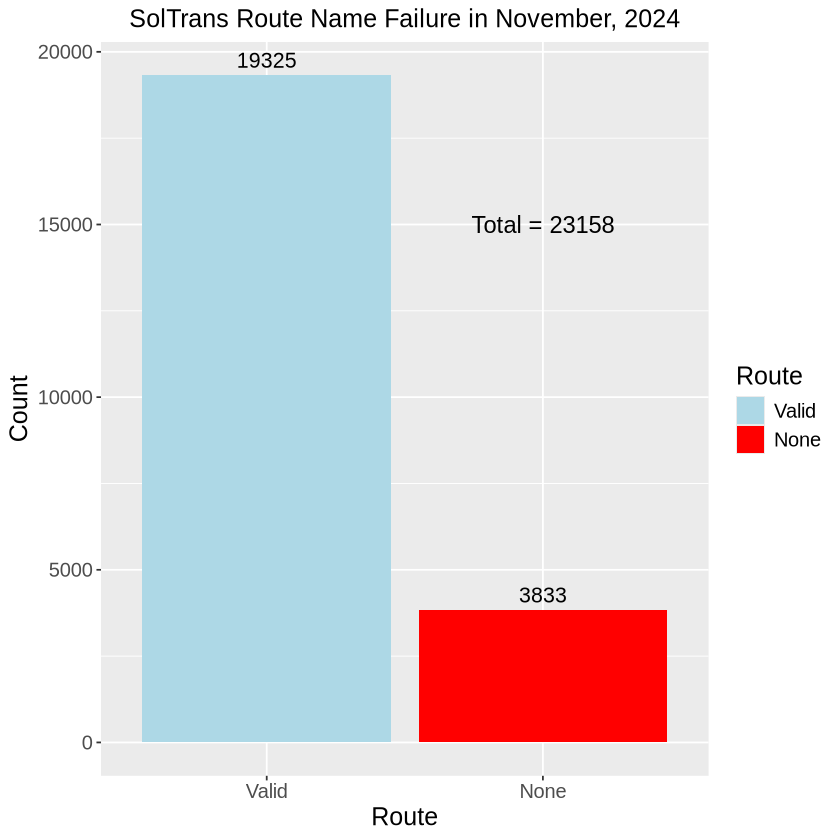

In [58]:
options(repr.plot.width = 7, repr.plot.height =7) 
NovFare %>% 
    mutate(Route = factor(Route, levels = c("Valid", "None"))) %>% 
    ggplot(aes(x = Route, fill = Route)) +
    geom_bar() +
    ggtitle("SolTrans Route Name Failure in November, 2024") +
    ylab("Count") +
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    geom_text(
        aes(label=..count..), stat = "count",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) +
    scale_fill_manual("Route", values = c("Valid" = "lightblue", "None" = "red")) +
    annotate("text", x=2, y=15000, label= paste0("Total = ", nrow(NovFare)), size = 5)


In [59]:
X = NovFare %>% 
    count(Route)
X

Route n    
1 None   3833
2 Valid 19325

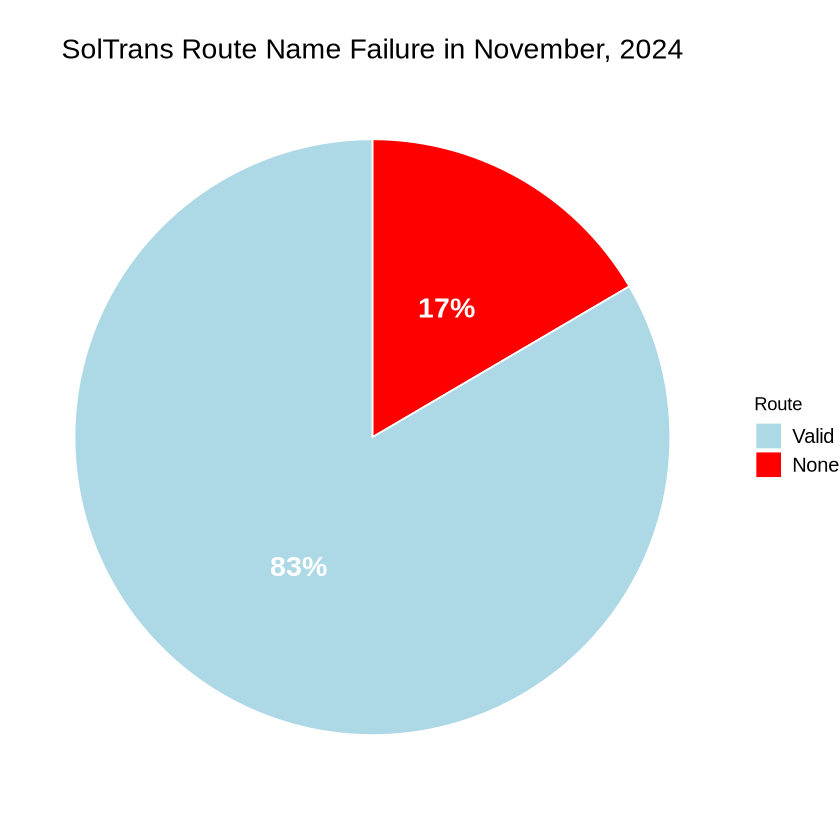

In [60]:
X %>% 
    mutate(prop = n / sum(X$n) *100) %>%
    mutate(ypos = cumsum(prop)- 0.5*prop ) %>% 
    mutate(prop1 = scales::percent(n / sum(X$n))) %>% 
    ggplot(aes(x = "", y=prop, fill=factor(Route, levels = c("Valid", "None")))) +
    geom_bar(stat="identity", width=1, color="white") +                
    coord_polar("y", start=0) +
    theme_void() + 
    geom_text(aes(y = ypos, label = prop1), color = "white", size=6, fontface = "bold") +
    scale_fill_manual("Route", values = c("Valid" = "lightblue", "None" = "red")) +
    ggtitle("SolTrans Route Name Failure in November, 2024") +
    theme(plot.title = element_text(hjust = 0.5, size = 17)) +
    theme(legend.text = element_text(size = 12))


### Route Name Failures by Each Cause

In [61]:
SolTransTU_NovFare = SolTransTU %>% 
    select(-trip_id) %>% 
    distinct() %>% 
    mutate(Reason = "Clipper") %>% 
    right_join(NovFare) %>% 
    replace_na(list(Reason = "CNX"))  %>% 
    mutate(RouteID = ifelse(Route == "Valid", Route, paste0(Route,"-",Reason)))
head(SolTransTU_NovFare)
dim(SolTransTU_NovFare)

Joining with `by = join_by(Date, Time, Bus)`


Date       Time     Bus  Reason  Route RouteID
1 2024-11-01 05:42:00 3910 Clipper Valid Valid  
2 2024-11-01 05:50:00 3910 Clipper Valid Valid  
3 2024-11-01 06:06:00 3910 Clipper Valid Valid  
4 2024-11-01 06:42:00 3910 Clipper Valid Valid  
5 2024-11-01 08:28:00 3910 Clipper Valid Valid  
6 2024-11-01 08:34:00 3910 Clipper Valid Valid

[1] 23158     6

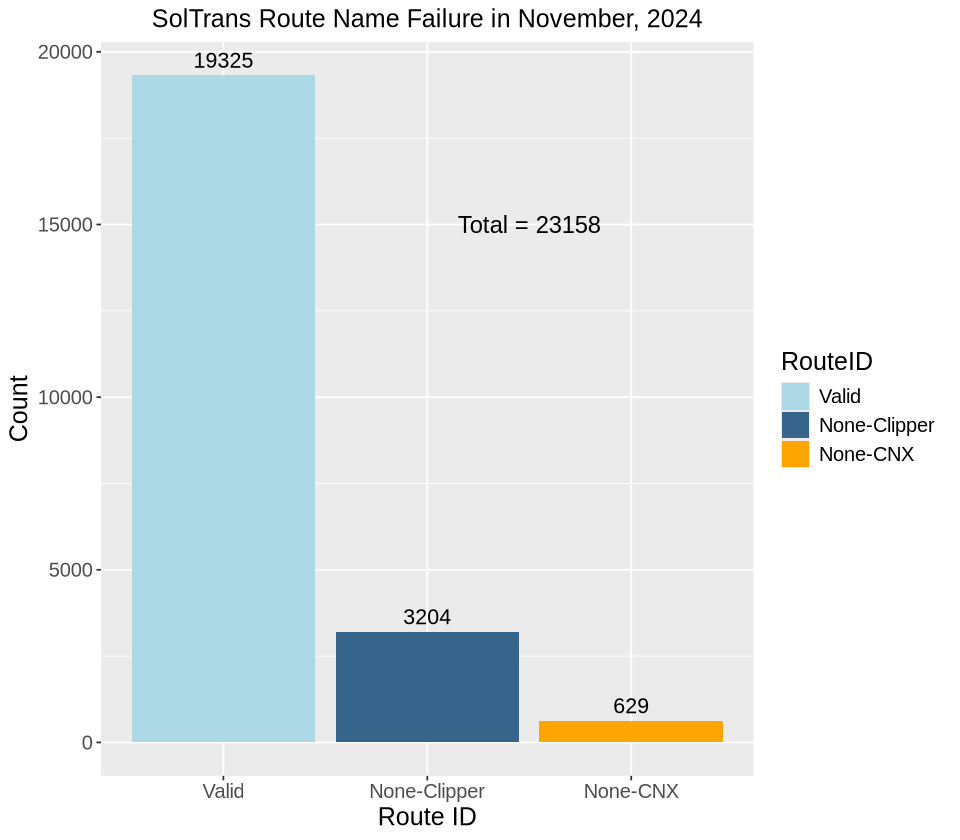

In [62]:
options(repr.plot.width = 8, repr.plot.height =7) 
SolTransTU_NovFare %>% 
    mutate(RouteID = factor(RouteID, levels = c("Valid", "None-Clipper", "None-CNX"))) %>% 
    ggplot(aes(x = RouteID , fill = RouteID)) +
    geom_bar() +
    ggtitle("SolTrans Route Name Failure in November, 2024") +
    ylab("Count") +
    xlab("Route ID")+
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    geom_text(
        aes(label=..count..), stat = "count",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) +
    scale_fill_manual("RouteID", values = c("Valid" = "lightblue", "None-Clipper" = "steelblue4", "None-CNX" = "orange")) +
    annotate("text", x=2.5, y=15000, label= paste0("Total = ", nrow(NovFare)), size = 5)


In [63]:
NovFare %>% 
    count(Route) %>%
    mutate(prop = n / sum(X$n) *100) %>%
    mutate(ypos = cumsum(prop)- 0.5*prop ) %>% 
    mutate(prop1 = scales::percent(n / sum(X$n)))# %>% 


Route n     prop     ypos      prop1
1 None   3833 16.55152  8.275758 17%  
2 Valid 19325 83.44848 58.275758 83%

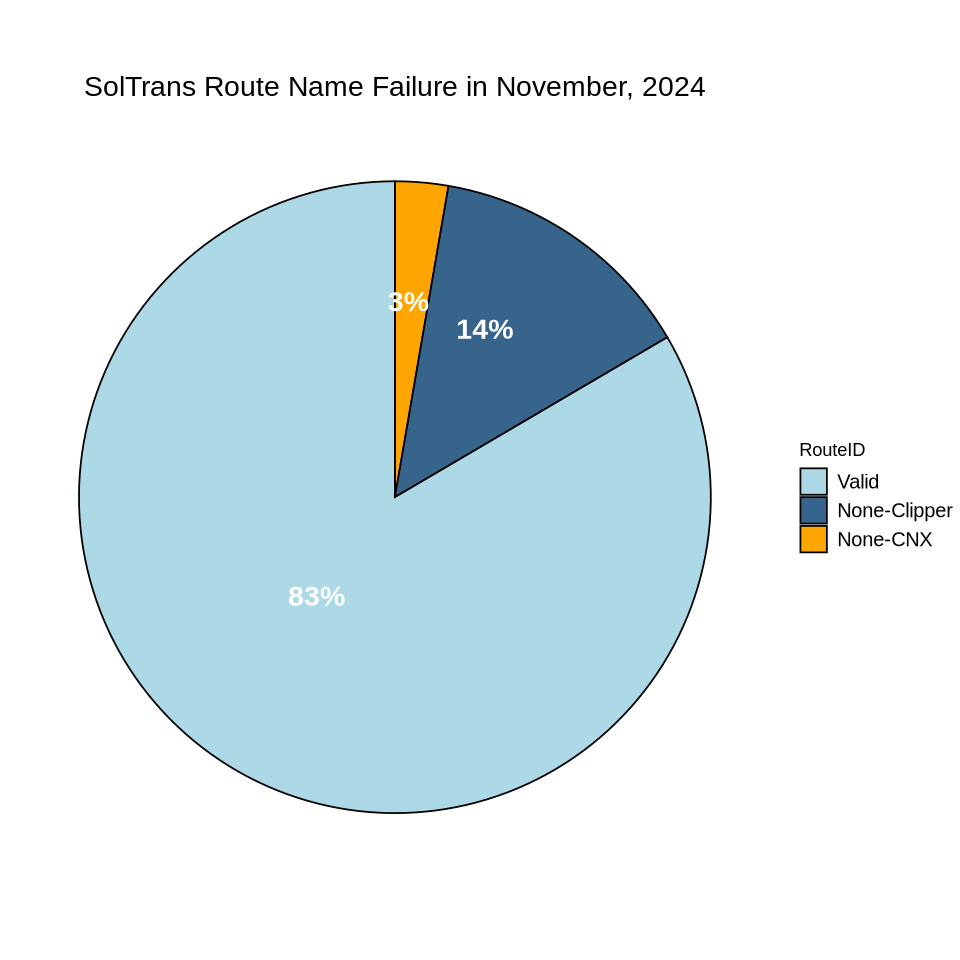

In [64]:
options(repr.plot.width = 8, repr.plot.height =8) 
SolTransTU_NovFare %>% 
    count(RouteID) %>%
    mutate(prop = n / sum(X$n) *100) %>%
    mutate(ypos = cumsum(prop)- 0.5*prop ) %>% 
    mutate(prop1 = scales::percent(n / sum(X$n))) %>% 
    ggplot(aes(x = "", y=prop, fill=factor(RouteID, levels = c("Valid", "None-Clipper", "None-CNX")))) +
    geom_bar(stat="identity", width=1, color="black") +
    coord_polar("y", start=0) +
    theme_void() + 
    geom_text(aes(y = ypos, label = prop1), color = "white", size=6, 
              fontface = "bold",
              vjust = -1.5) +
    scale_fill_manual("RouteID", values = c("Valid" = "lightblue", "None-Clipper" = "steelblue4", "None-CNX" = "orange")) +
    ggtitle("SolTrans Route Name Failure in November, 2024") +
    theme(plot.title = element_text(hjust = 0.5, size = 17)) +
    theme(legend.text = element_text(size = 12))


### Hardware-Related Issues

In [65]:
head(SolTransTU_NovFare)
dim(SolTransTU_NovFare)

Date       Time     Bus  Reason  Route RouteID
1 2024-11-01 05:42:00 3910 Clipper Valid Valid  
2 2024-11-01 05:50:00 3910 Clipper Valid Valid  
3 2024-11-01 06:06:00 3910 Clipper Valid Valid  
4 2024-11-01 06:42:00 3910 Clipper Valid Valid  
5 2024-11-01 08:28:00 3910 Clipper Valid Valid  
6 2024-11-01 08:34:00 3910 Clipper Valid Valid

[1] 23158     6

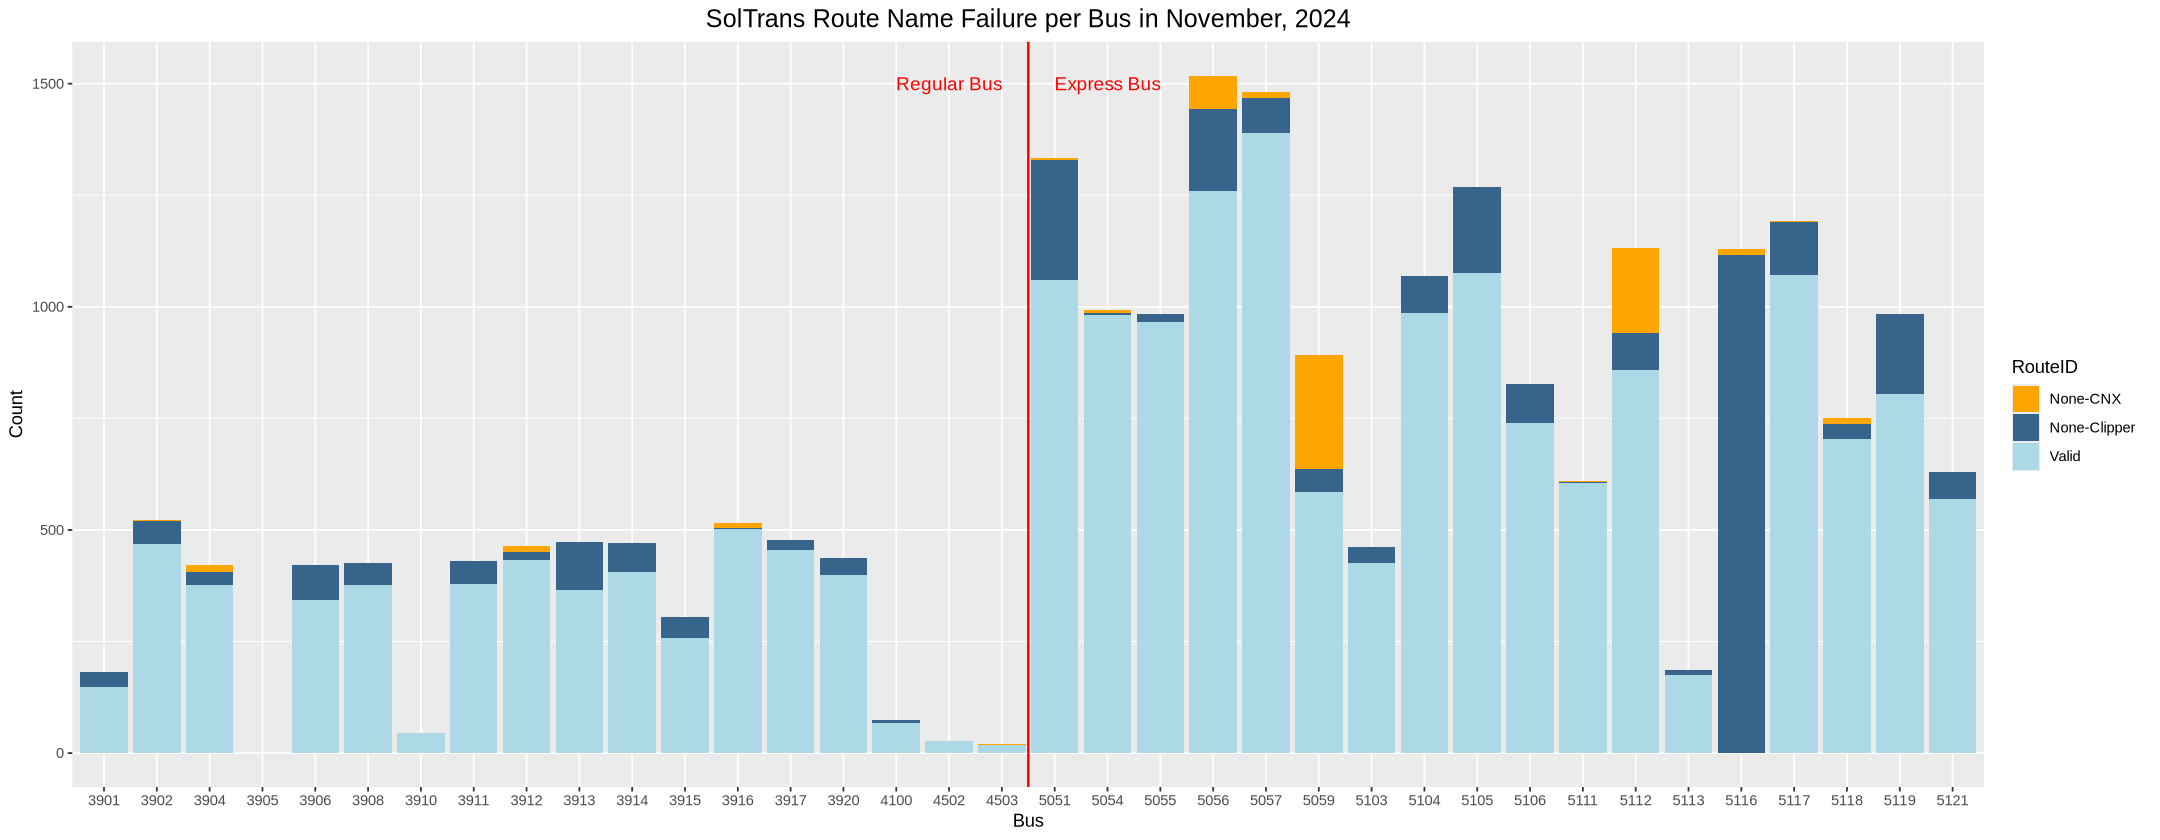

In [66]:
options(repr.plot.width = 18, repr.plot.height =7) 
SolTransTU_NovFare %>% 
    mutate(RouteID = factor(RouteID, levels = c( "None-CNX", "None-Clipper", "Valid"))) %>% 
    ggplot(aes(x = Bus , fill = RouteID)) +
    geom_bar() +
    ggtitle("SolTrans Route Name Failure per Bus in November, 2024") +
    ylab("Count") +
    xlab("Bus")+
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    # geom_text(
    #     aes(label=..count..), stat = "count",
    #     size = 4.5,
    #     position = position_dodge(0.9),
    #     vjust = -.5) +
    # theme(text = element_text(size = 15),
    #     axis.text.x = element_text(hjust = 0.5)) +
    scale_fill_manual("RouteID", values = c("Valid" = "lightblue", "None-Clipper" = "steelblue4", "None-CNX" = "orange")) +
    geom_vline(xintercept = 18.5, color = "red", linewidth = .7) +
    annotate("text", x=17, y=1500, label= paste0("Regular Bus"), size = 4, color = "red") +
    annotate("text", x=20, y=1500, label= paste0("Express Bus"), size = 4, color = "red")


### Express Bus Failures

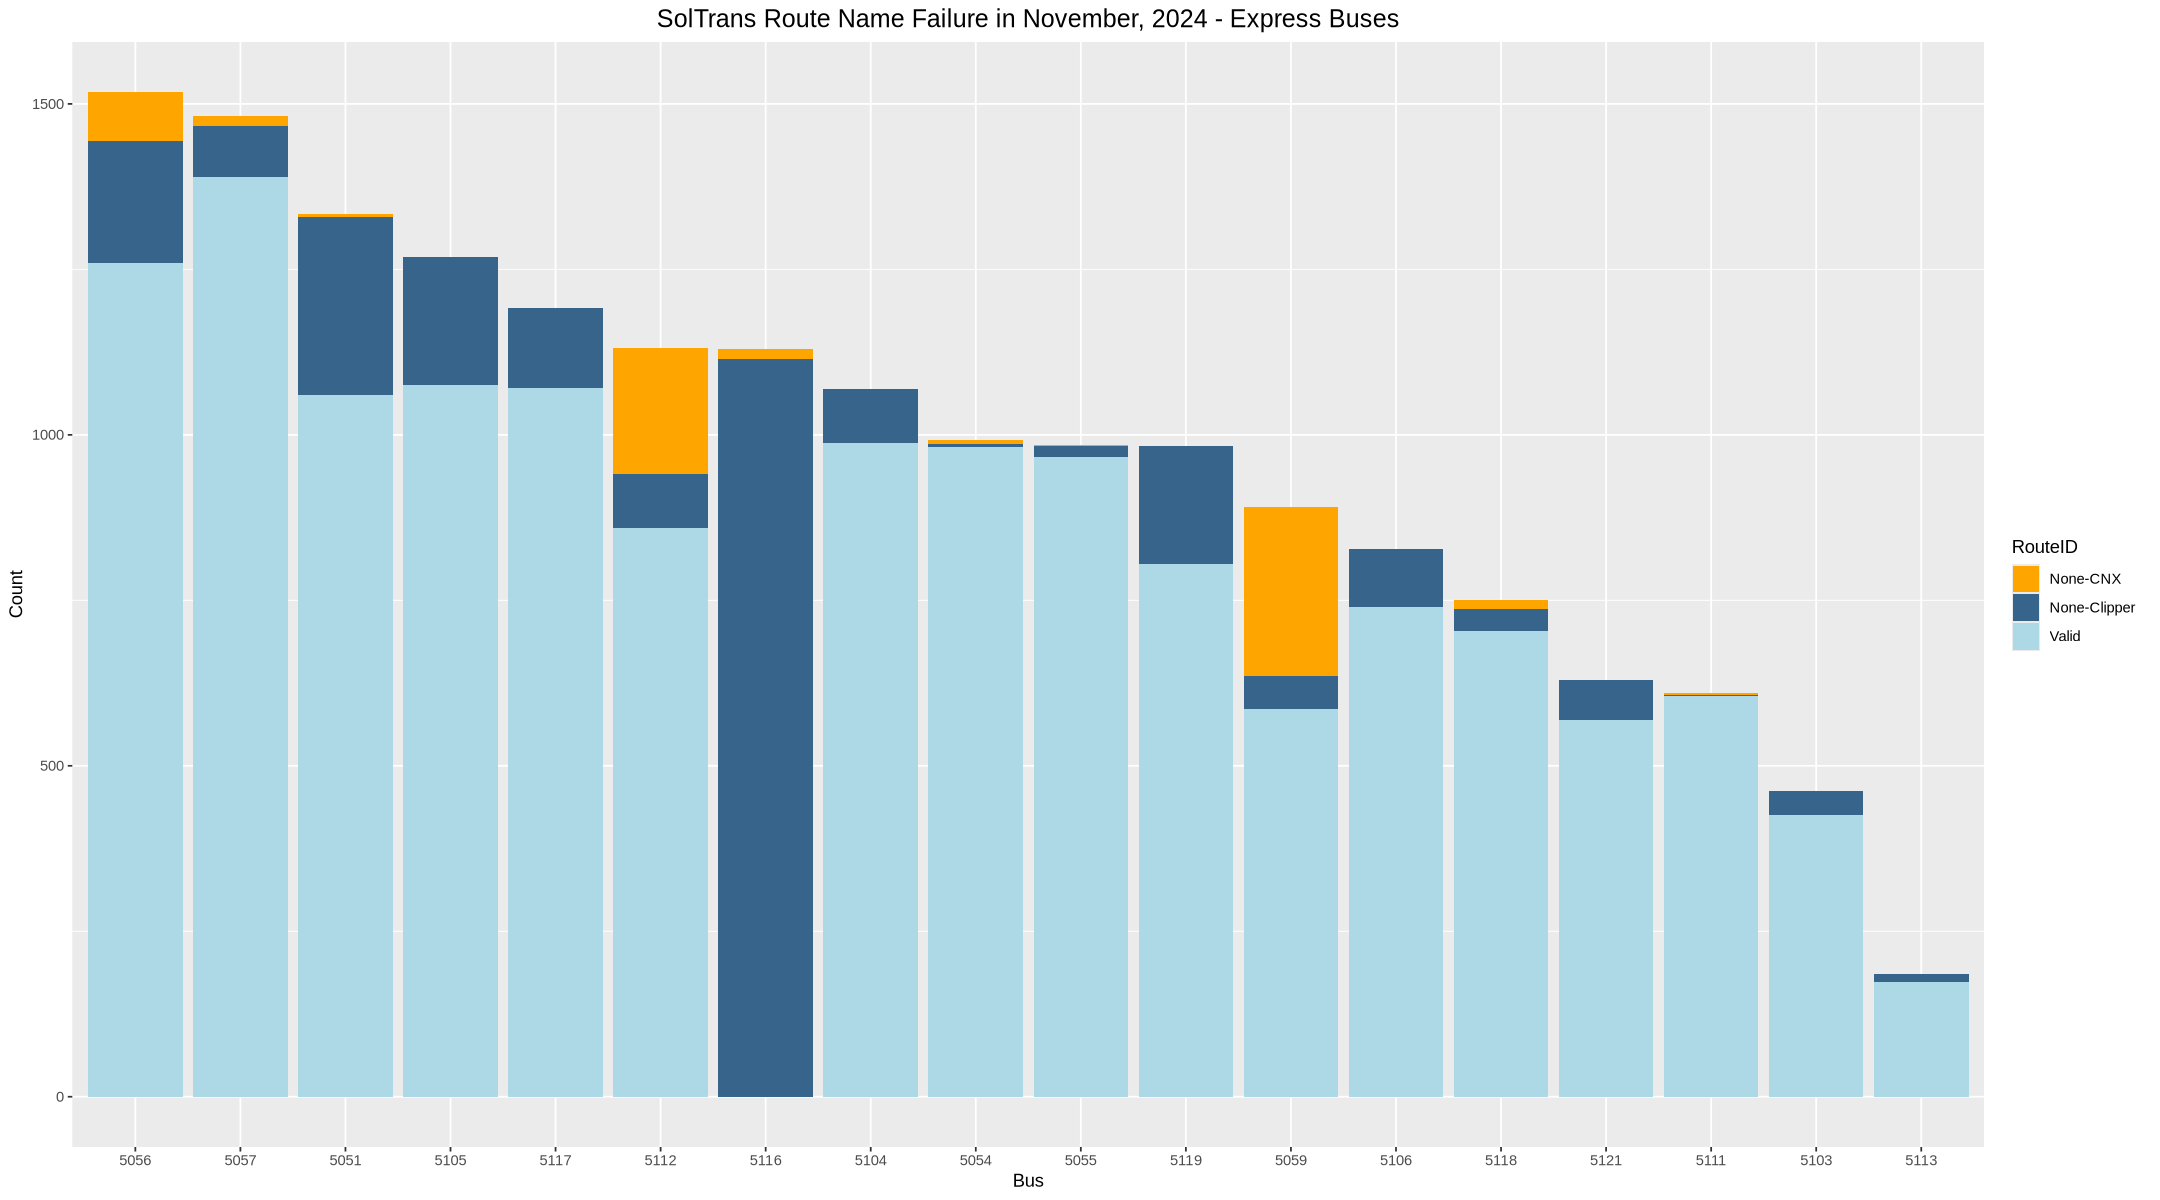

In [67]:
options(repr.plot.width = 18, repr.plot.height =10) 
SolTransTU_NovFare %>% 
    filter(Bus > 5000) %>% 
    ggplot(aes(x = fct_infreq(Bus), fill = factor(RouteID, levels = c( "None-CNX", "None-Clipper", "Valid")))) +
    geom_bar() +
    ggtitle("SolTrans Route Name Failure in November, 2024 - Express Buses") +
    ylab("Count") +
    xlab("Bus")+
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    # geom_text(
    #     aes(label=..count..), stat = "count",
    #     size = 4.5,
    #     position = position_dodge(0.9),
    #     vjust = -.5) +
    # theme(text = element_text(size = 15),
    #     axis.text.x = element_text(hjust = 0.5)) +
    scale_fill_manual("RouteID", values = c("Valid" = "lightblue", "None-Clipper" = "steelblue4", "None-CNX" = "orange")) 


In [68]:
head(SolTransTU_NovFare)

Date       Time     Bus  Reason  Route RouteID
1 2024-11-01 05:42:00 3910 Clipper Valid Valid  
2 2024-11-01 05:50:00 3910 Clipper Valid Valid  
3 2024-11-01 06:06:00 3910 Clipper Valid Valid  
4 2024-11-01 06:42:00 3910 Clipper Valid Valid  
5 2024-11-01 08:28:00 3910 Clipper Valid Valid  
6 2024-11-01 08:34:00 3910 Clipper Valid Valid

In [69]:
new = SolTransTU_NovFare %>% 
    select(Bus, RouteID) %>% 
    filter(Bus > 5000)
head(new)
dim(new)

Bus  RouteID
1 5113 Valid  
2 5113 Valid  
3 5113 Valid  
4 5113 Valid  
5 5113 Valid  
6 5113 Valid

[1] 17441     2

In [70]:
counts = new %>%
  group_by(Bus, RouteID) %>%
  summarise(count = n() , .groups = "drop_last") %>%
  group_by(Bus) %>%
  mutate(x = round(count / sum(count) * 100, 1))
counts

Bus  RouteID      count x   
1  5051 None-CNX        5   0.4
2  5051 None-Clipper  269  20.2
3  5051 Valid        1060  79.5
4  5054 None-CNX        6   0.6
5  5054 None-Clipper    4   0.4
6  5054 Valid         982  99.0
7  5055 None-CNX        1   0.1
8  5055 None-Clipper   16   1.6
9  5055 Valid         967  98.3
10 5056 None-CNX       74   4.9
11 5056 None-Clipper  185  12.2
12 5056 Valid        1259  82.9
13 5057 None-CNX       15   1.0
14 5057 None-Clipper   77   5.2
15 5057 Valid        1390  93.8
16 5059 None-CNX      255  28.6
17 5059 None-Clipper   50   5.6
18 5059 Valid         586  65.8
19 5103 None-Clipper   37   8.0
20 5103 Valid         425  92.0
21 5104 None-Clipper   82   7.7
22 5104 Valid         987  92.3
23 5105 None-Clipper  192  15.1
24 5105 Valid        1076  84.9
25 5106 None-Clipper   88  10.6
26 5106 Valid         740  89.4
27 5111 None-CNX        3   0.5
28 5111 None-Clipper    1   0.2
29 5111 Valid         606  99.3
30 5112 None-CNX      190  16.8
31 5112 None-Clipper   82   7.3
32 5112 Valid         859  76.0
33 5113 None-Clipper   12   6.5
34 5113 Valid         174  93.5
35 5116 None-CNX       15   1.3
36 5116 None-Clipper 1115  98.7
37 5117 None-CNX        1   0.1
38 5117 None-Clipper  120  10.1
39 5117 Valid        1071  89.8
40 5118 None-CNX       14   1.9
41 5118 None-Clipper   33   4.4
42 5118 Valid         704  93.7
43 5119 None-Clipper  178  18.1
44 5119 Valid         805  81.9
45 5121 None-Clipper   61   9.7
46 5121 Valid         569  90.3

In [71]:
bus_route_combos <- expand_grid(
  Bus = unique(new$Bus),
  RouteID = unique(new$RouteID)
)
bus_route_combos

Bus  RouteID     
1  5113 Valid       
2  5113 None-Clipper
3  5113 None-CNX    
4  5051 Valid       
5  5051 None-Clipper
6  5051 None-CNX    
7  5054 Valid       
8  5054 None-Clipper
9  5054 None-CNX    
10 5055 Valid       
11 5055 None-Clipper
12 5055 None-CNX    
13 5056 Valid       
14 5056 None-Clipper
15 5056 None-CNX    
16 5057 Valid       
17 5057 None-Clipper
18 5057 None-CNX    
19 5059 Valid       
20 5059 None-Clipper
21 5059 None-CNX    
22 5103 Valid       
23 5103 None-Clipper
24 5103 None-CNX    
25 5104 Valid       
26 5104 None-Clipper
27 5104 None-CNX    
28 5105 Valid       
29 5105 None-Clipper
30 5105 None-CNX    
31 5106 Valid       
32 5106 None-Clipper
33 5106 None-CNX    
34 5111 Valid       
35 5111 None-Clipper
36 5111 None-CNX    
37 5112 Valid       
38 5112 None-Clipper
39 5112 None-CNX    
40 5116 Valid       
41 5116 None-Clipper
42 5116 None-CNX    
43 5117 Valid       
44 5117 None-Clipper
45 5117 None-CNX    
46 5118 Valid       
47 5118 None-Clipper
48 5118 None-CNX    
49 5119 Valid       
50 5119 None-Clipper
51 5119 None-CNX    
52 5121 Valid       
53 5121 None-Clipper
54 5121 None-CNX

In [72]:
full_data <- bus_route_combos %>%
  left_join(counts, by = c("Bus", "RouteID")) %>%
  mutate(x = replace_na(x, 0))
full_data

Bus  RouteID      count x   
1  5113 Valid         174  93.5
2  5113 None-Clipper   12   6.5
3  5113 None-CNX       NA   0.0
4  5051 Valid        1060  79.5
5  5051 None-Clipper  269  20.2
6  5051 None-CNX        5   0.4
7  5054 Valid         982  99.0
8  5054 None-Clipper    4   0.4
9  5054 None-CNX        6   0.6
10 5055 Valid         967  98.3
11 5055 None-Clipper   16   1.6
12 5055 None-CNX        1   0.1
13 5056 Valid        1259  82.9
14 5056 None-Clipper  185  12.2
15 5056 None-CNX       74   4.9
16 5057 Valid        1390  93.8
17 5057 None-Clipper   77   5.2
18 5057 None-CNX       15   1.0
19 5059 Valid         586  65.8
20 5059 None-Clipper   50   5.6
21 5059 None-CNX      255  28.6
22 5103 Valid         425  92.0
23 5103 None-Clipper   37   8.0
24 5103 None-CNX       NA   0.0
25 5104 Valid         987  92.3
26 5104 None-Clipper   82   7.7
27 5104 None-CNX       NA   0.0
28 5105 Valid        1076  84.9
29 5105 None-Clipper  192  15.1
30 5105 None-CNX       NA   0.0
31 5106 Valid         740  89.4
32 5106 None-Clipper   88  10.6
33 5106 None-CNX       NA   0.0
34 5111 Valid         606  99.3
35 5111 None-Clipper    1   0.2
36 5111 None-CNX        3   0.5
37 5112 Valid         859  76.0
38 5112 None-Clipper   82   7.3
39 5112 None-CNX      190  16.8
40 5116 Valid          NA   0.0
41 5116 None-Clipper 1115  98.7
42 5116 None-CNX       15   1.3
43 5117 Valid        1071  89.8
44 5117 None-Clipper  120  10.1
45 5117 None-CNX        1   0.1
46 5118 Valid         704  93.7
47 5118 None-Clipper   33   4.4
48 5118 None-CNX       14   1.9
49 5119 Valid         805  81.9
50 5119 None-Clipper  178  18.1
51 5119 None-CNX       NA   0.0
52 5121 Valid         569  90.3
53 5121 None-Clipper   61   9.7
54 5121 None-CNX       NA   0.0

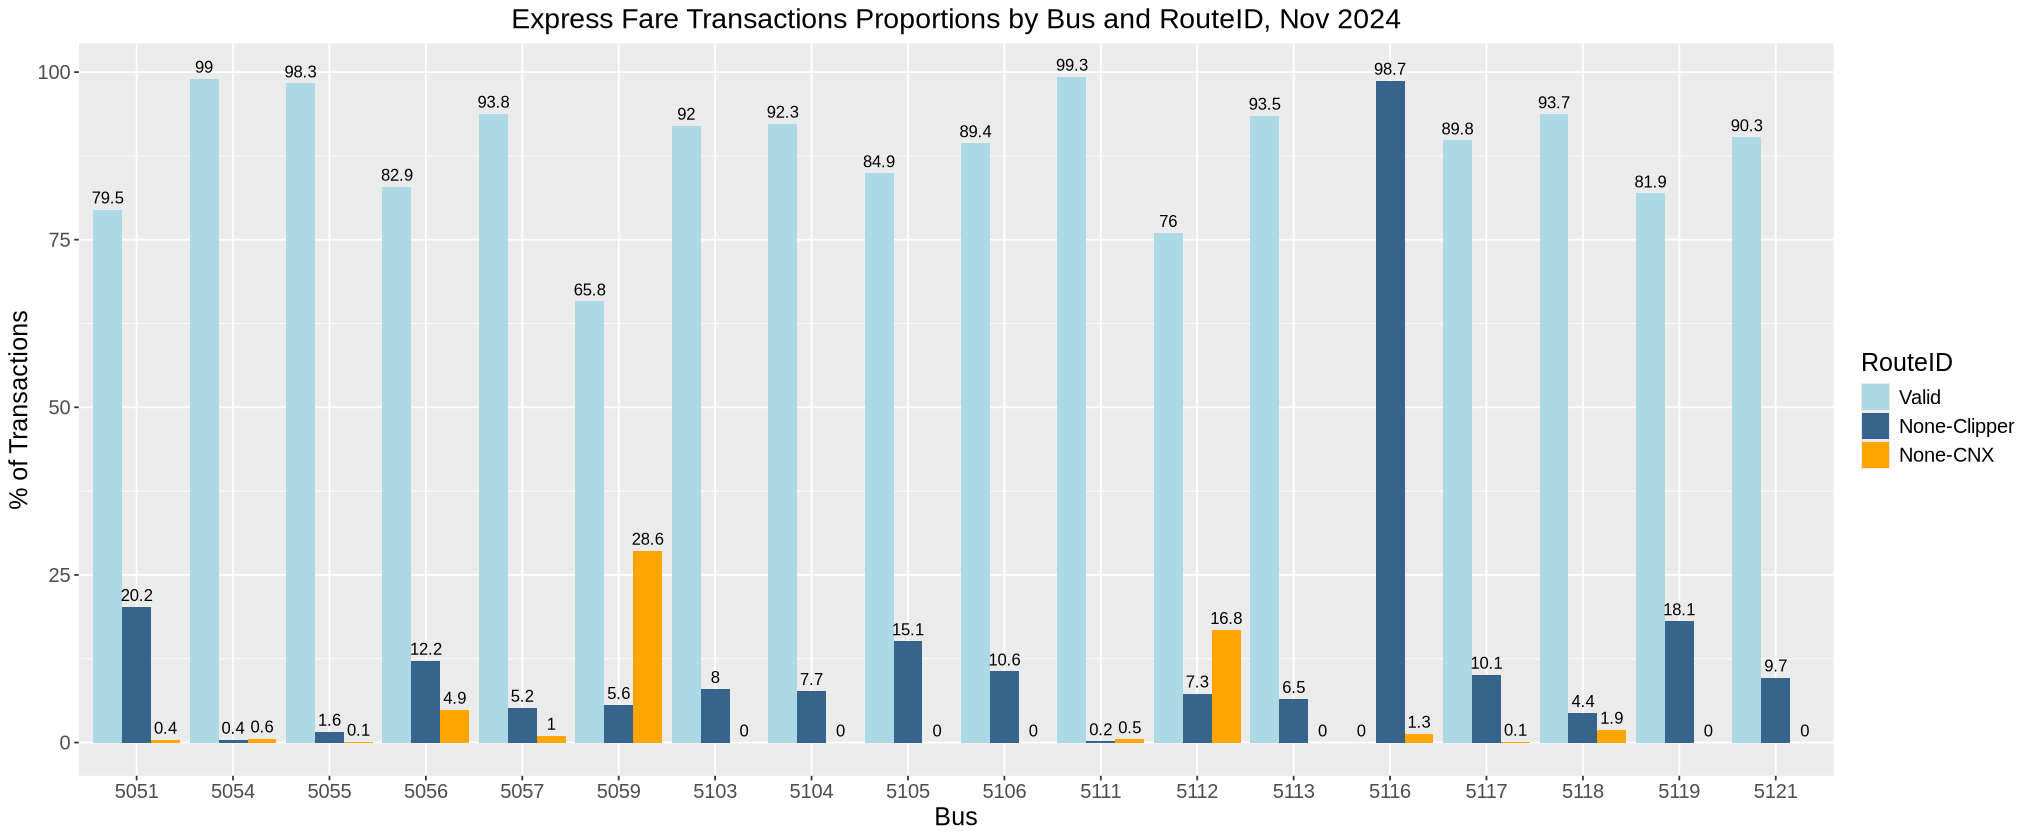

In [101]:
options(repr.plot.width = 17, repr.plot.height = 7) 
full_data %>% 
    mutate(RouteID = factor(RouteID, levels = c("Valid", "None-Clipper", "None-CNX"))) %>% 
    ggplot(aes(x = Bus, y = x, fill = RouteID)) +
        scale_fill_manual("RouteID", values = c("Valid" = "lightblue", "None-Clipper" = "steelblue4", "None-CNX" = "orange"))+
        geom_col(position = "dodge") +
        labs(y = "% of Transactions", title = "Express Fare Transactions Proportions by Bus and RouteID, Nov 2024") +
        theme(plot.title = element_text(hjust = 0.5, size = 17)) +
        theme(text = element_text(size = 15),axis.text.x = element_text(hjust = 0.5)) + 
        geom_text(
            aes(label=x), stat = "Identity",
            size = 3.5,
            position = position_dodge(0.9),
            vjust = -.5) 




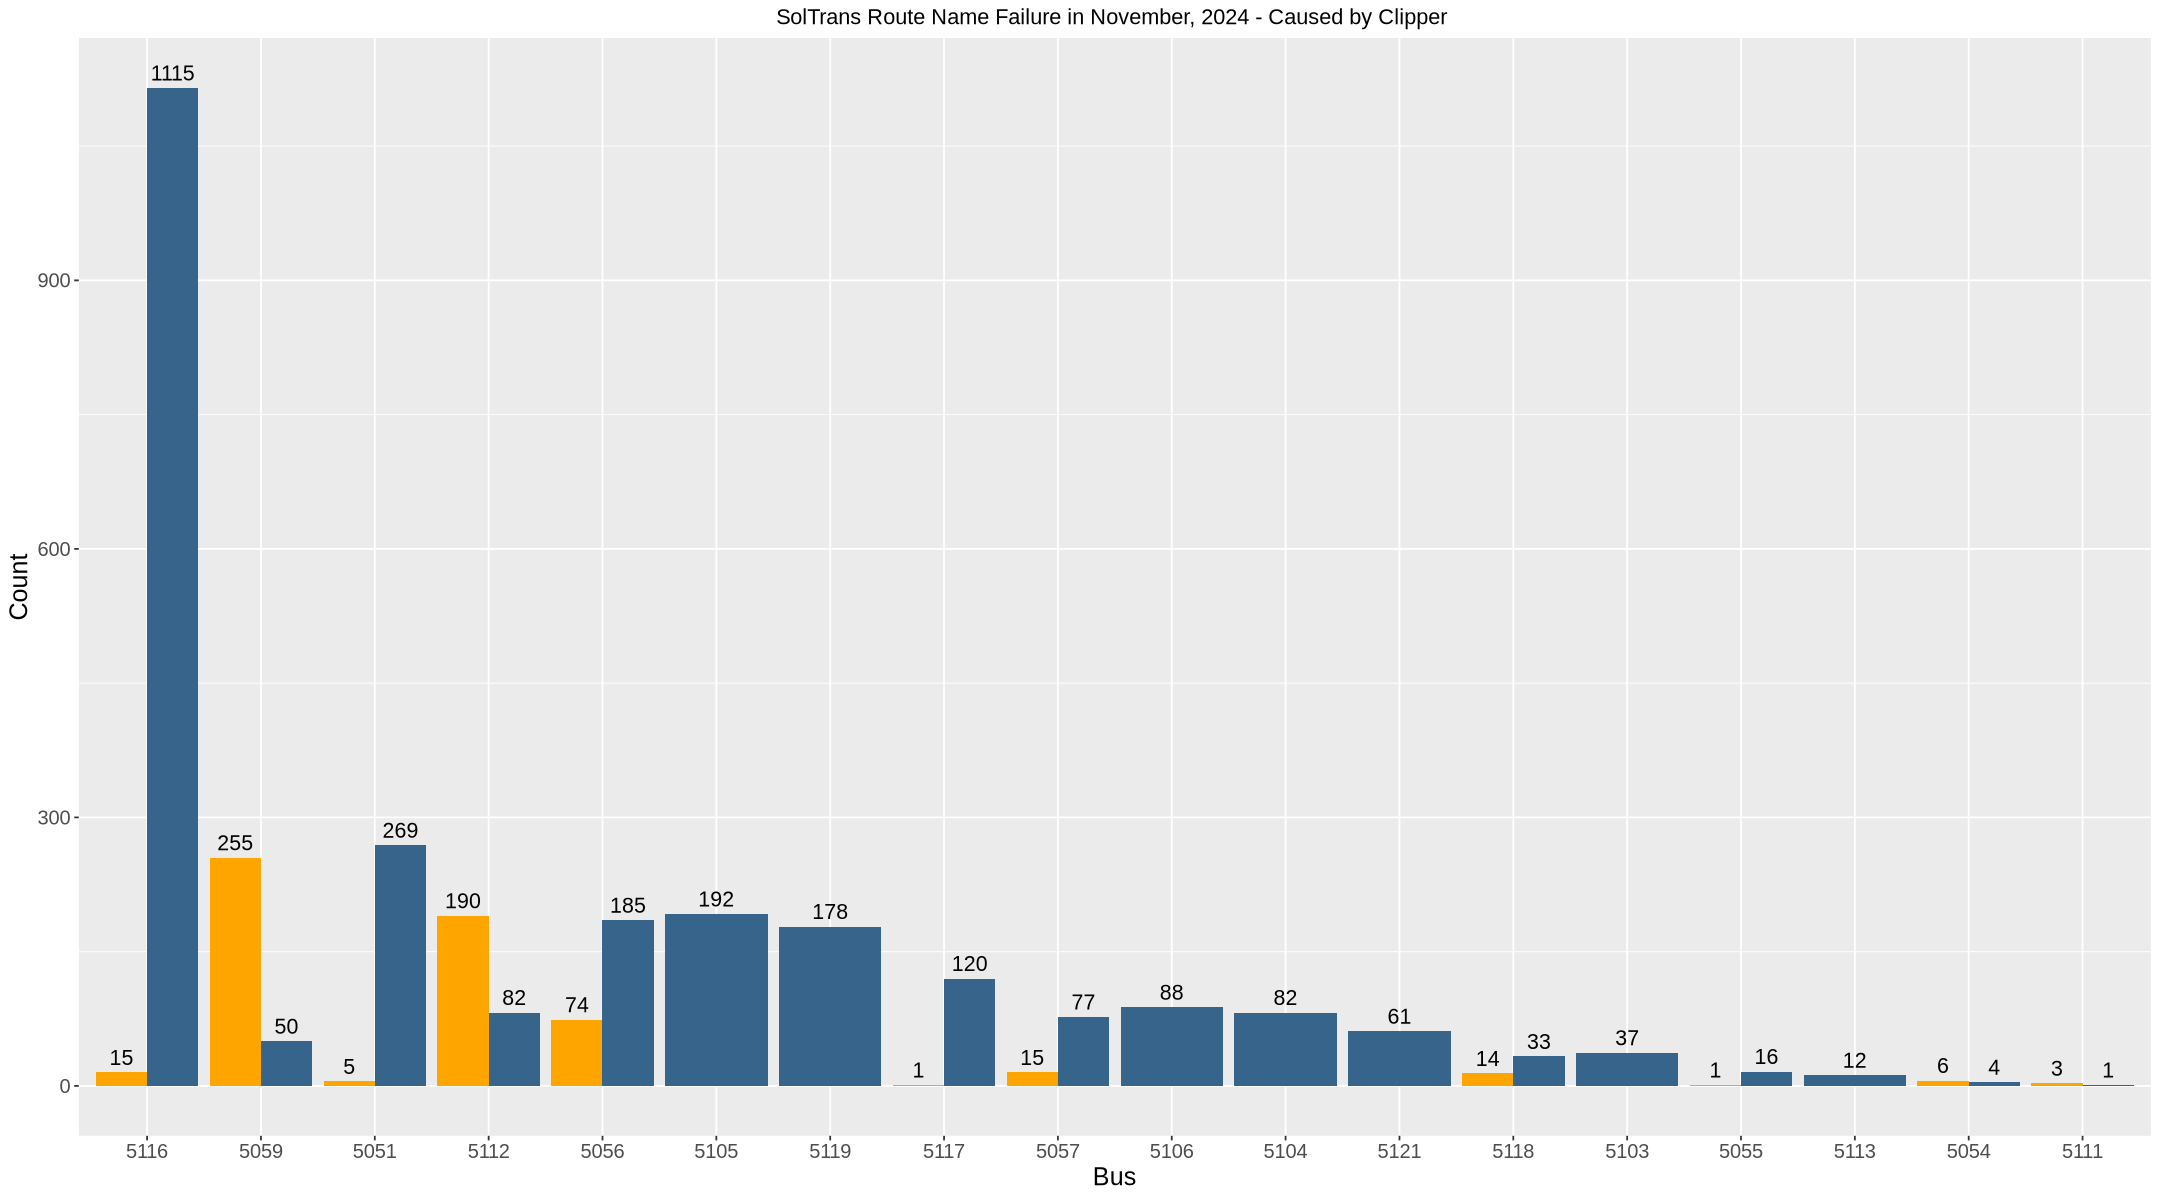

In [74]:
options(repr.plot.width = 18, repr.plot.height =10) 
(SolTransTU_NovFare %>% 
    filter(Bus > 5000,
           (RouteID == "None-Clipper" |
            RouteID == "None-CNX")) %>% 
    ggplot(aes(x = fct_infreq(Bus), fill = factor(RouteID, levels = c( "None-CNX", "None-Clipper", "Valid")))) +
    geom_bar(position = "dodge") +
    ggtitle("SolTrans Route Name Failure in November, 2024 - Caused by Clipper ") +
    ylab("Count") +
    xlab("Bus")+
    theme(plot.title = element_text(hjust = 0.5, size = 13)) +
    scale_fill_manual("RouteID", values = c("Valid" = "lightblue", "None-Clipper" = "steelblue4", "None-CNX" = "orange"))+
    theme(legend.position = "none")+
    geom_text(
        aes(label=..count..), stat = "count",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) 

) 

# %>% 
#     ggplotly(height = 800, tooltip = "count") 


Joining with `by = join_by(Bus)`
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


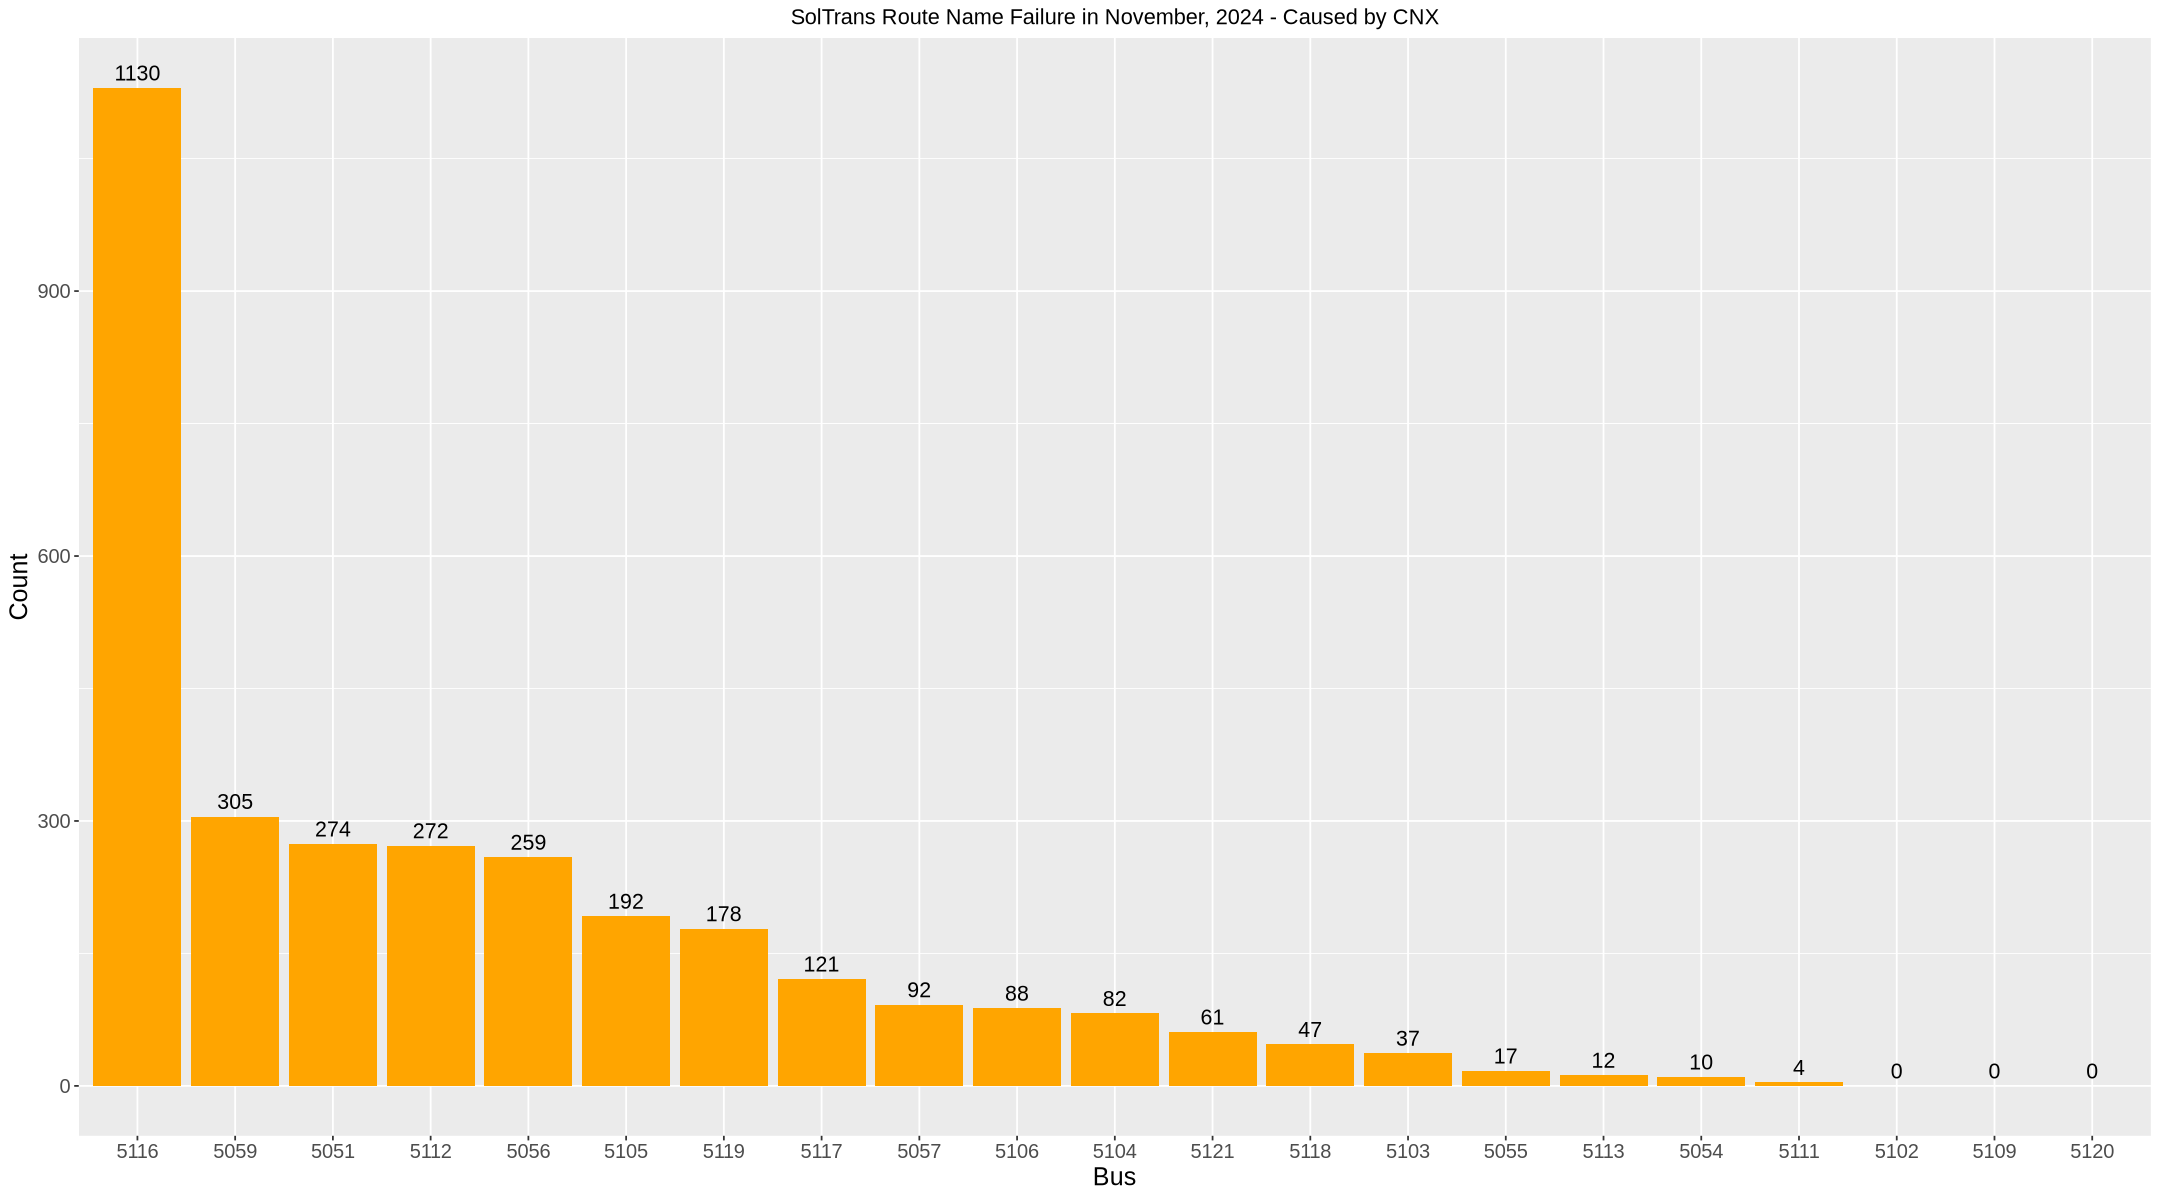

In [75]:
options(repr.plot.width = 18, repr.plot.height =10) 
(SolTransTU_NovFare %>% 
    filter(Bus > 5000,
           (RouteID == "None-Clipper" |
            RouteID == "None-CNX")) %>% 
    count(Bus) %>% 
    right_join(Bus %>% filter(Bus > 5000)) %>% 
    replace_na(list(n = 0)) %>% 
    select(Bus, Count = n) %>% 
    arrange(Bus) %>% 
    ggplot(aes(x = reorder(Bus, -Count), y = Count)) +
    geom_bar(stat = "identity", fill = "orange", position = "dodge") +

    # ggplot(aes(x = fct_infreq(Bus), fill = factor(RouteID, levels = c( "None-CNX", "None-Clipper", "Valid")))) +
    # geom_bar() +
    ggtitle("SolTrans Route Name Failure in November, 2024 - Caused by CNX") +
    ylab("Count") +
    xlab("Bus")+
    theme(plot.title = element_text(hjust = 0.5, size = 13)) +
    scale_fill_manual("RouteID", values = c("Valid" = "lightblue", "None-Clipper" = "steelblue4", "None-CNX" = "orange"))+
    theme(legend.position = "none") +
    geom_text(
        aes(label=Count), stat = "Identity",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) 
) 
# %>% 
#     ggplotly(height = 800, tooltip = "Count") 


### •	Clipper vs. Connexionz Failures

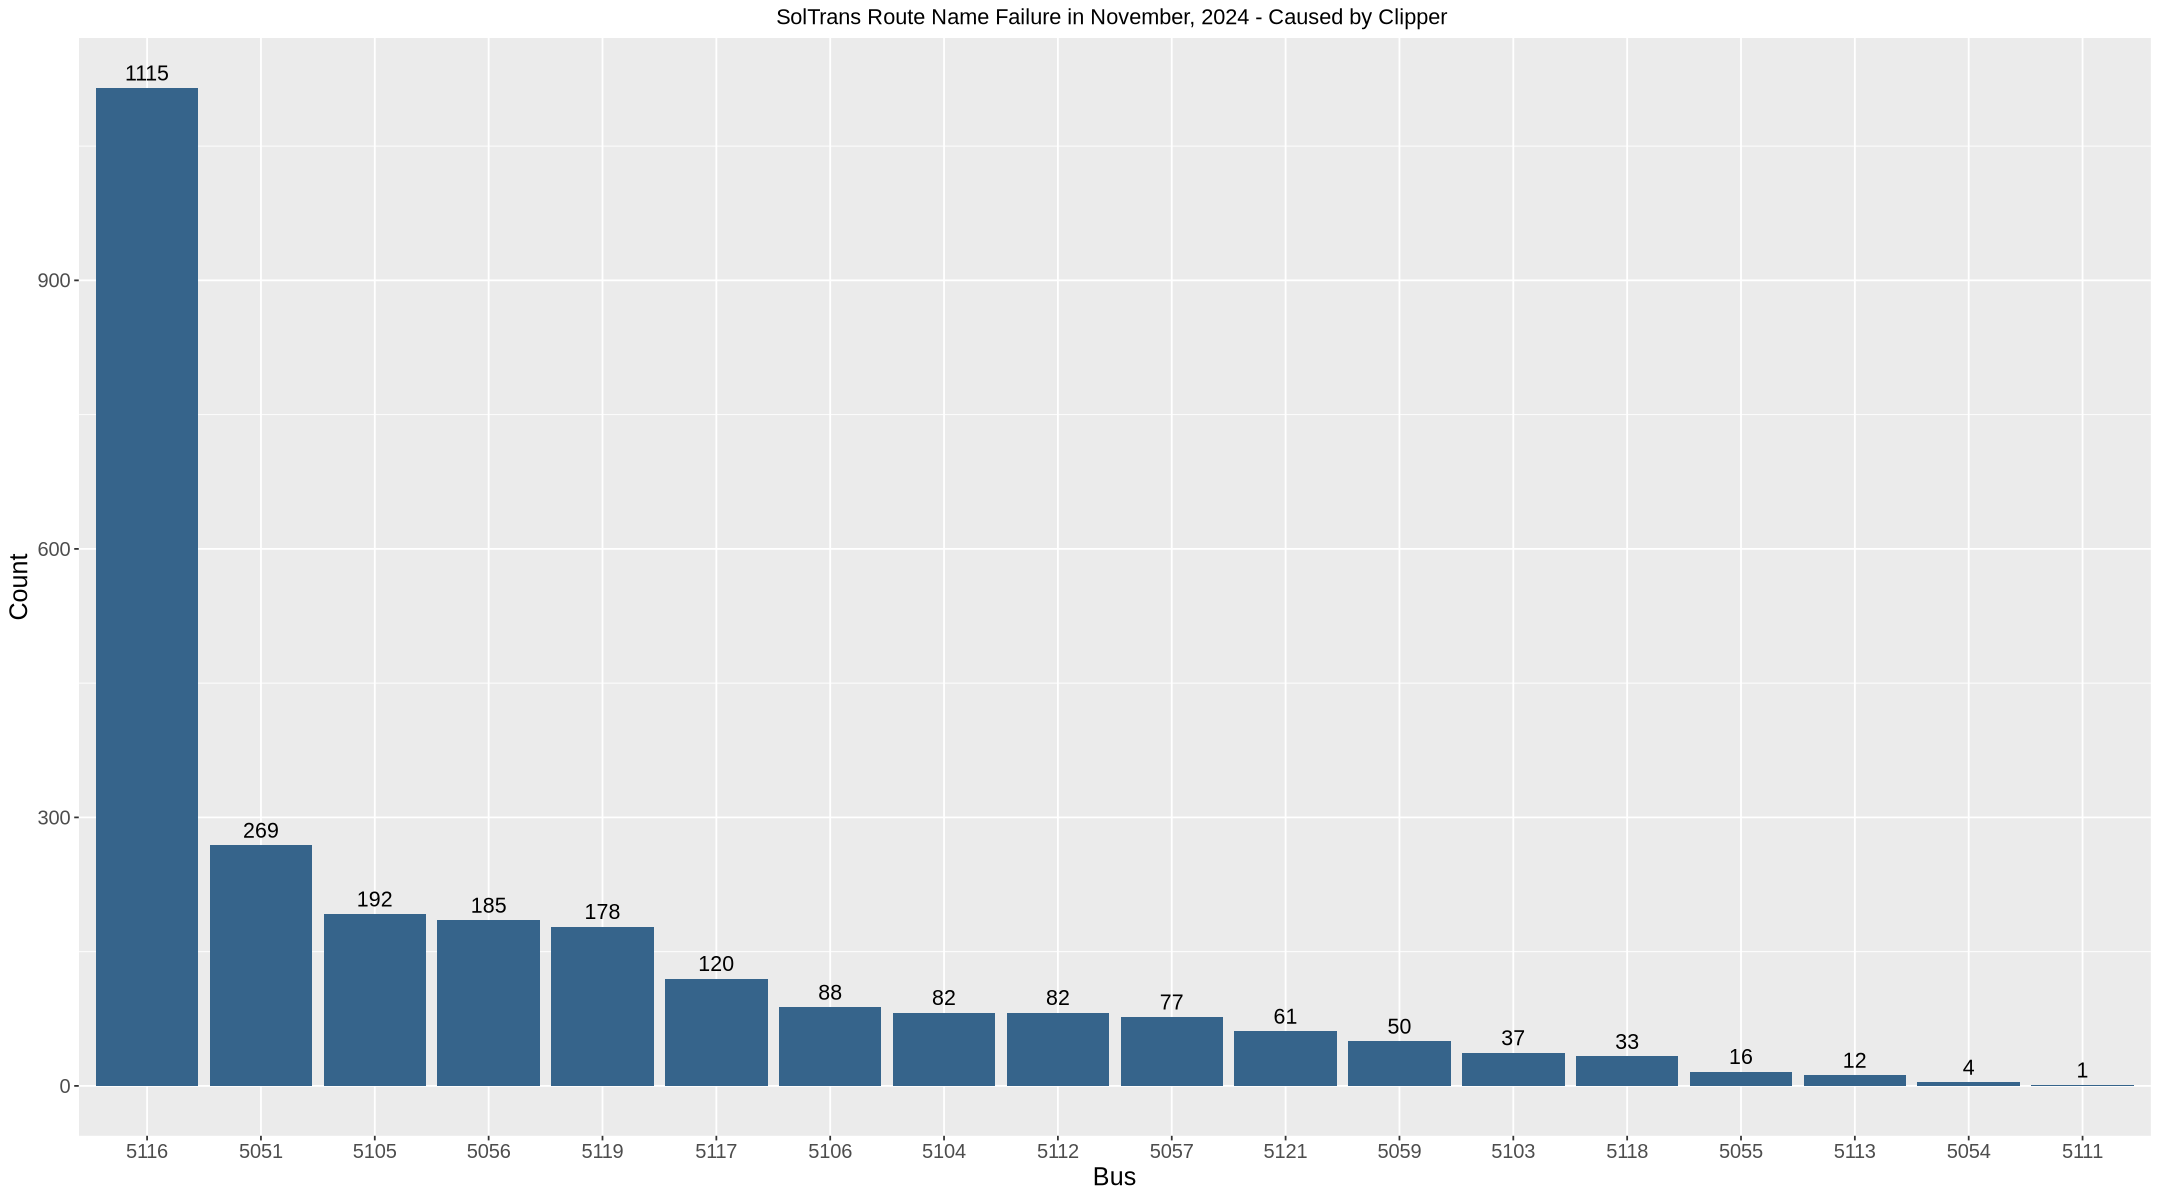

In [76]:
options(repr.plot.width = 18, repr.plot.height =10) 
(SolTransTU_NovFare %>% 
    filter(Bus > 5000,
           RouteID == "None-Clipper") %>% 
    ggplot(aes(x = fct_infreq(Bus), fill = factor(RouteID, levels = c( "None-CNX", "None-Clipper", "Valid")))) +
    geom_bar() +
    ggtitle("SolTrans Route Name Failure in November, 2024 - Caused by Clipper ") +
    ylab("Count") +
    xlab("Bus")+
    theme(plot.title = element_text(hjust = 0.5, size = 13)) +
    scale_fill_manual("RouteID", values = c("Valid" = "lightblue", "None-Clipper" = "steelblue4", "None-CNX" = "orange"))+
    theme(legend.position = "none")+
    geom_text(
        aes(label=..count..), stat = "count",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) 

) 

# %>% 
#     ggplotly(height = 800, tooltip = "count") 


Joining with `by = join_by(Bus)`
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


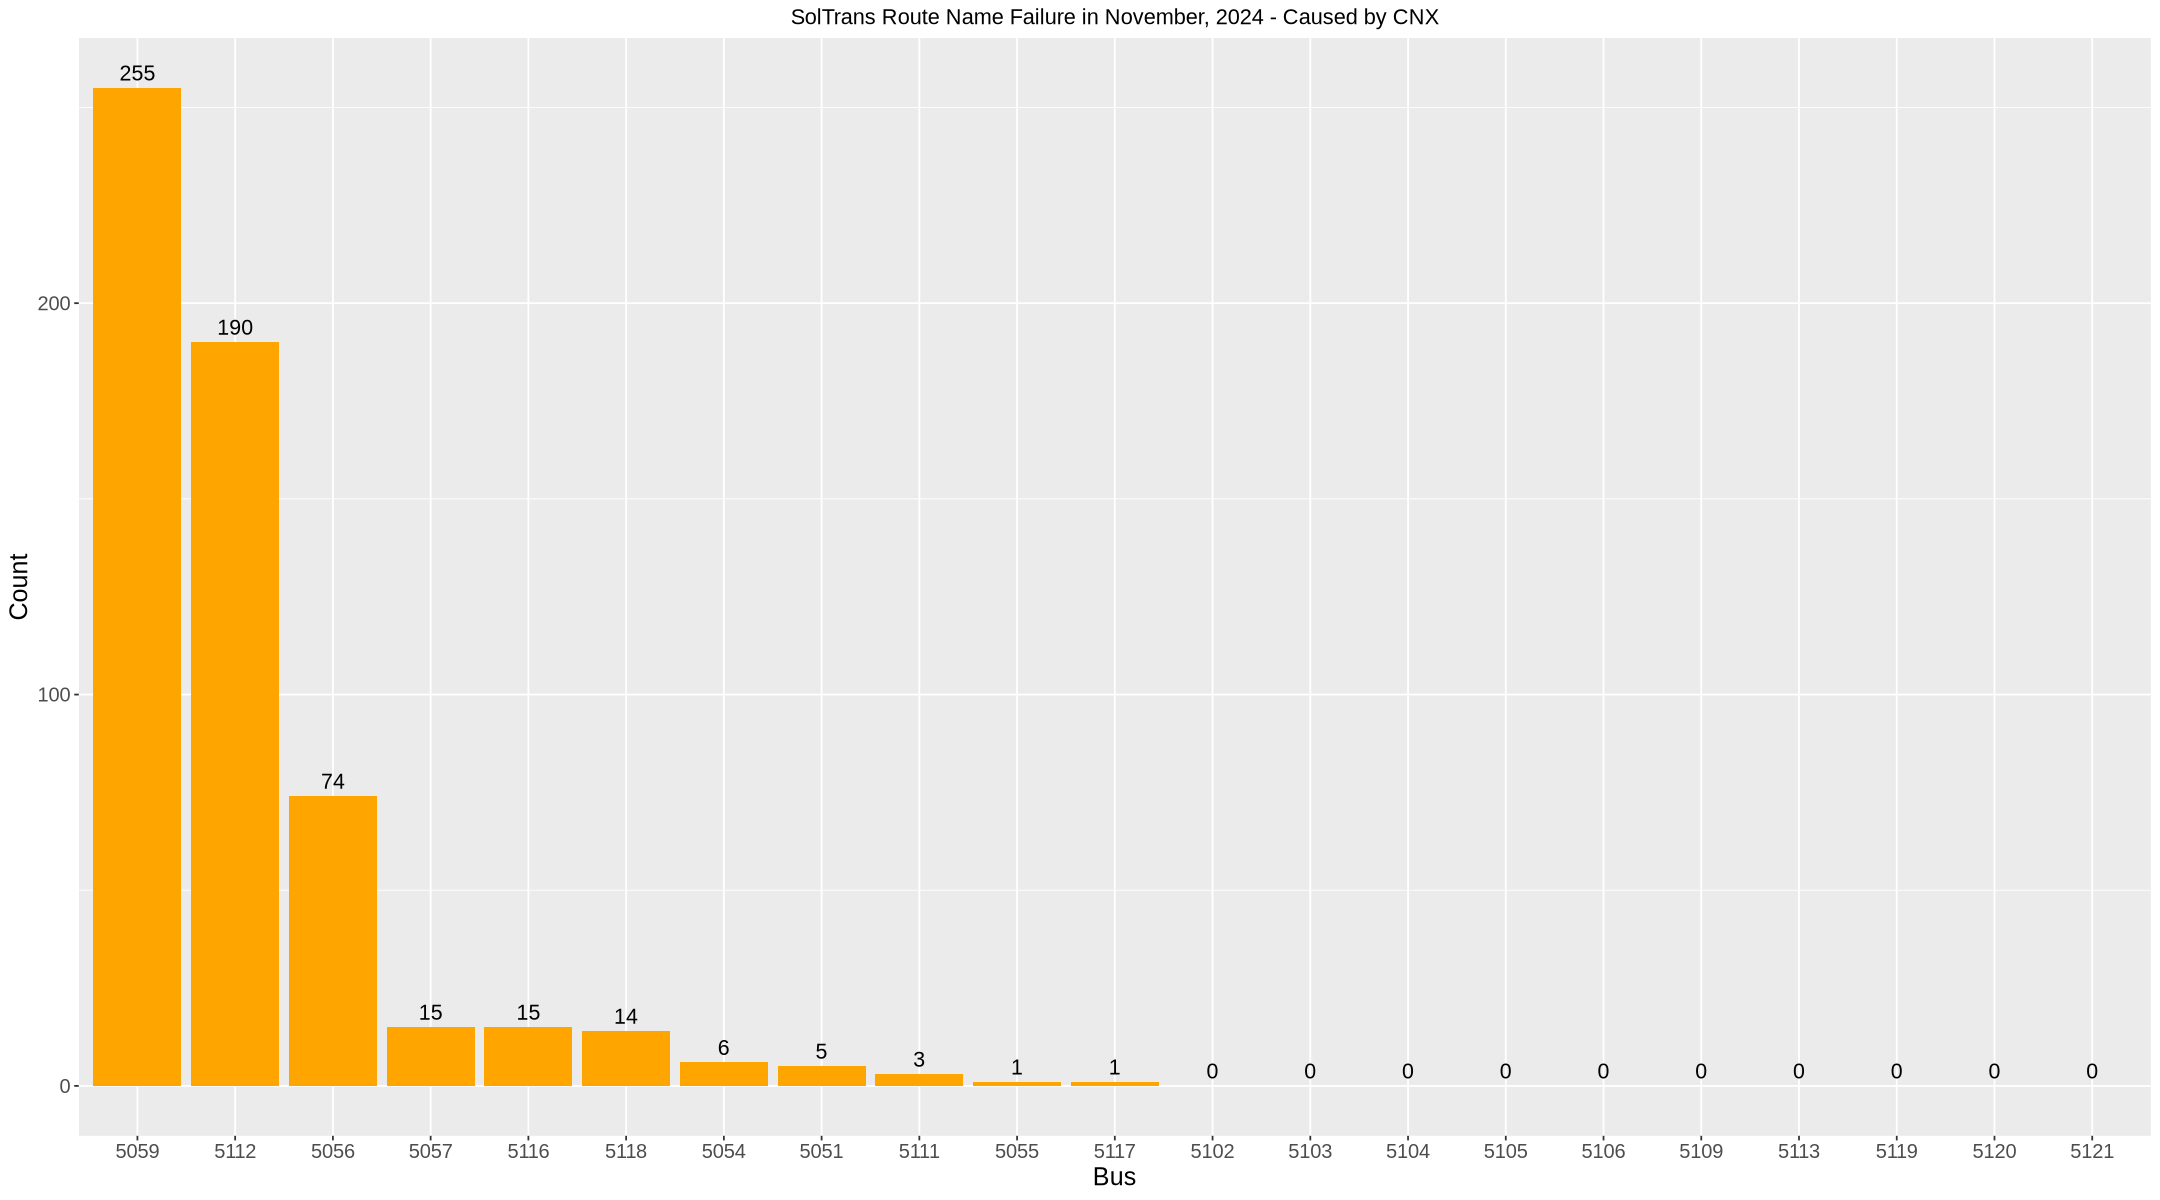

In [77]:
options(repr.plot.width = 18, repr.plot.height =10) 
(SolTransTU_NovFare %>% 
    filter(Bus > 5000,
           RouteID == "None-CNX") %>% 
    count(Bus) %>% 
    right_join(Bus %>% filter(Bus > 5000)) %>% 
    replace_na(list(n = 0)) %>% 
    select(Bus, Count = n) %>% 
    arrange(Bus) %>% 
    ggplot(aes(x = reorder(Bus, -Count), y = Count)) +
    geom_bar(stat = "identity", fill = "orange") +

    # ggplot(aes(x = fct_infreq(Bus), fill = factor(RouteID, levels = c( "None-CNX", "None-Clipper", "Valid")))) +
    # geom_bar() +
    ggtitle("SolTrans Route Name Failure in November, 2024 - Caused by CNX") +
    ylab("Count") +
    xlab("Bus")+
    theme(plot.title = element_text(hjust = 0.5, size = 13)) +
    scale_fill_manual("RouteID", values = c("Valid" = "lightblue", "None-Clipper" = "steelblue4", "None-CNX" = "orange"))+
    theme(legend.position = "none") +
    geom_text(
        aes(label=Count), stat = "Identity",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) 
) 
# %>% 
#     ggplotly(height = 800, tooltip = "Count") 


### •	Revenue and Losses

In [78]:
NovFareRevenue = Nov %>% 
    filter(recordType == 1,
           Bus > 5000) %>% 
    mutate(Route = ifelse(routeId == 835, "None", "Valid")) %>%
    filter(contractId == 0,
           purseAmount != 0,
           transferDiscountFlag == 0) %>% 
    select(Date, Time, Bus, Route, purseAmount)
head(NovFareRevenue)
dim(NovFareRevenue)

Date       Time     Bus  Route purseAmount
1 2024-11-01 02:45:00 5105 Valid 500        
2 2024-11-01 02:48:00 5105 Valid 250        
3 2024-11-01 02:49:00 5105 Valid 250        
4 2024-11-01 02:53:00 5105 Valid 500        
5 2024-11-01 02:55:00 5118 Valid 250        
6 2024-11-01 02:57:00 5118 Valid 500

[1] 13958     5

In [79]:
NovFareRevenue %>% 
    filter(Route == "None") %>% 
    dim()

[1] 2678    5

#### Amount Collected

In [80]:
M = tibble(Category = c("Collected Fare", "Expected Fare", "Total Loss"),
           Amounts = c(4747, 11867, 7120))
M

Category       Amounts
1 Collected Fare  4747  
2 Expected Fare  11867  
3 Total Loss      7120

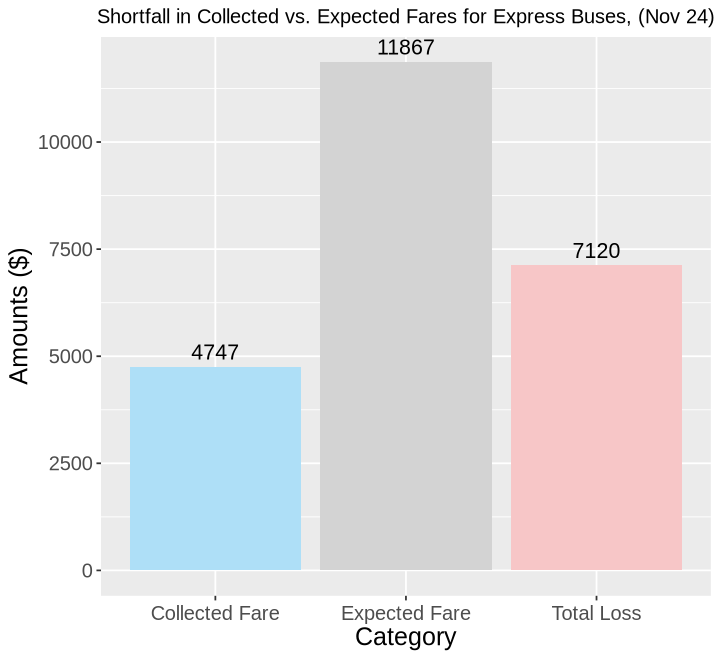

In [81]:
options(repr.plot.width = 6, repr.plot.height =5.5) 
ggplot(M, aes(x = Category, y = Amounts, fill = Category)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(angle = 0, hjust = 1)) +
    ggtitle("Shortfall in Collected vs. Expected Fares for Express Buses, (Nov 24)") +
    ylab("Amounts ($)") +
    xlab("Category")+
    theme(plot.title = element_text(hjust = 0.5, size = 12)) +
    geom_text(
        aes(label=Amounts), stat = "identity",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(legend.position = "none") +
    theme(text = element_text(size = 15), axis.text.x = element_text(hjust = 0.5, vjust = 0.6)) +
    scale_fill_manual(
      "Category",
      values = c(
        "Collected Fare" = "#AEDFF7",  # Light Blue
        "Expected Fare"  = "light grey", #"#C3E6CB",  # Light Green
        "Total Loss"     = "#F7C6C7"   # Light Red/Pink
      )
    )



In [82]:
SolTransTU_NovFareRevenue = SolTransTU %>% 
    select(-trip_id) %>% 
    distinct() %>% 
    mutate(Reason = "Clipper") %>% 
    right_join(NovFareRevenue) %>% 
    replace_na(list(Reason = "CNX"))  %>% 
    mutate(RouteID = ifelse(Route == "Valid", Route, paste0("Loss-", Reason)),
           Fare = ifelse(Route == "None", purseAmount * 1.5, purseAmount))
head(SolTransTU_NovFareRevenue)
dim(SolTransTU_NovFareRevenue)

Joining with `by = join_by(Date, Time, Bus)`


Date       Time     Bus  Reason  Route purseAmount RouteID Fare
1 2024-11-22 06:07:00 5113 Clipper Valid 500         Valid   500 
2 2024-11-22 06:07:00 5113 Clipper Valid 500         Valid   500 
3 2024-11-22 06:08:00 5113 Clipper Valid 500         Valid   500 
4 2024-11-22 06:08:00 5113 Clipper Valid 250         Valid   250 
5 2024-11-22 06:08:00 5113 Clipper Valid 500         Valid   500 
6 2024-11-22 06:08:00 5113 Clipper Valid 500         Valid   500

[1] 13958     8

In [83]:
# SolTransTU_NovFareRevenue

In [84]:
options(repr.plot.width = 8, repr.plot.height =7) 
X = SolTransTU_NovFareRevenue %>%
    filter(Route == "None") %>% 
    group_by(RouteID) %>% 
    summarise(Fares = sum(Fare)/100) 
head(X)
# X%>% 
#     ggplot(aes(x = RouteID, y = Fares , fill = RouteID)) +
#     geom_bar(stat = "identity") +
#     ggtitle("SolTrans Revenue Loss in November, 2024") +
#     ylab("Revenue Loss") +
#     xlab("Reason")+
#     theme(plot.title = element_text(hjust = 0.5, size = 15)) +
#     geom_text(
#         aes(label=Fares), stat = "identity",
#         size = 4.5,
#         position = position_dodge(0.9),
#         vjust = -.5) +
#     theme(text = element_text(size = 15),
#         axis.text.x = element_text(hjust = 0.5)) +
#     scale_fill_manual("Reason", values = c("Loss-Clipper" = "steelblue4", "Loss-CNX" = "orange")) +
#     annotate("text", x=2, y=7500, label= paste0("Total Loss = ", sum(X$Fares)), size = 5)


RouteID      Fares 
1 Loss-CNX     1212.0
2 Loss-Clipper 5908.5

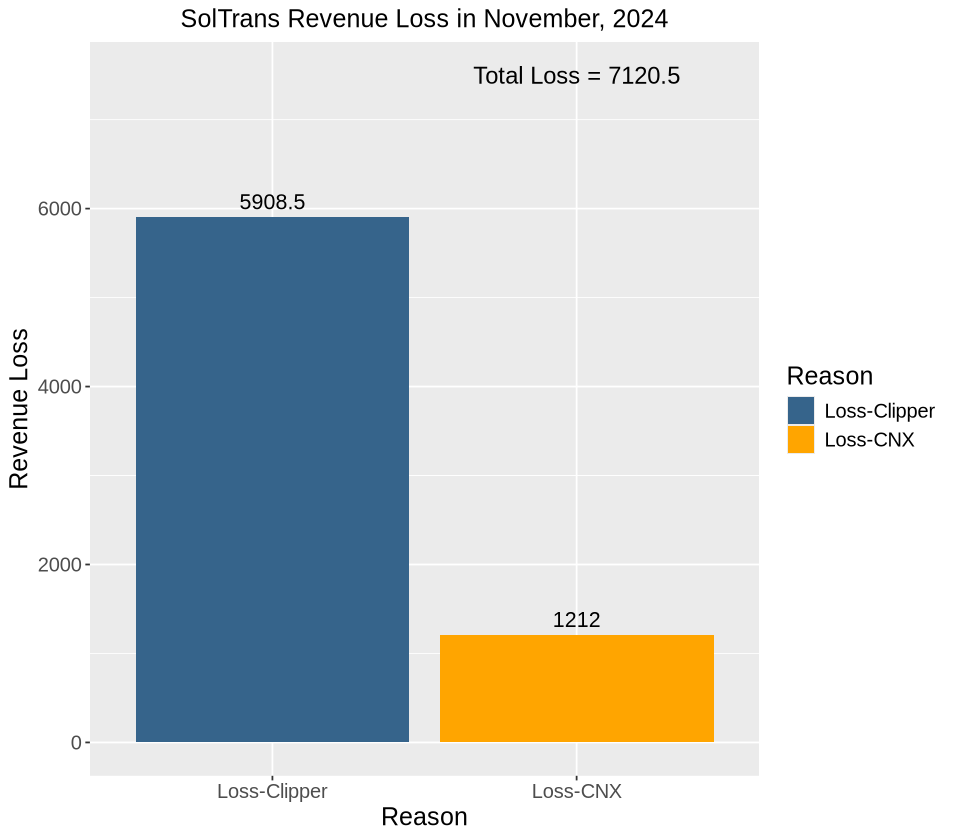

In [85]:
options(repr.plot.width = 8, repr.plot.height =7) 
X = SolTransTU_NovFareRevenue %>%
    filter(Route == "None") %>% 
    group_by(RouteID) %>% 
    summarise(Fares = sum(Fare)/100) 
X%>% 
    ggplot(aes(x = RouteID, y = Fares , fill = RouteID)) +
    geom_bar(stat = "identity") +
    ggtitle("SolTrans Revenue Loss in November, 2024") +
    ylab("Revenue Loss") +
    xlab("Reason")+
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    geom_text(
        aes(label=Fares), stat = "identity",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) +
    scale_fill_manual("Reason", values = c("Loss-Clipper" = "steelblue4", "Loss-CNX" = "orange")) +
    annotate("text", x=2, y=7500, label= paste0("Total Loss = ", sum(X$Fares)), size = 5)


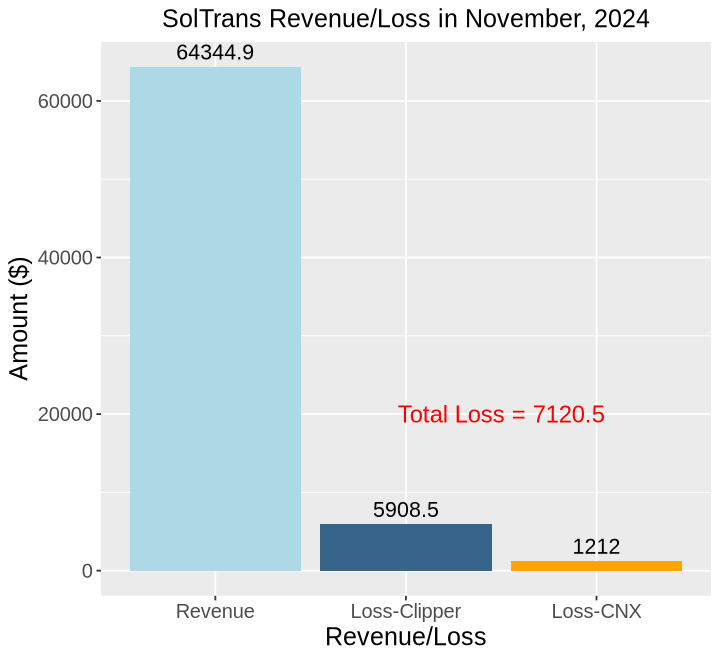

In [86]:
options(repr.plot.width = 6, repr.plot.height =5.5) 
X = SolTransTU_NovFareRevenue %>%
    filter(Route == "None") %>% 
    group_by(RouteID) %>% 
    summarise(Fares = sum(Fare)/100) %>% 
    add_row(RouteID = "Revenue", Fares = sum(Nov$purseAmount, na.rm = TRUE)/100)

X%>% 
    mutate(RouteID = factor(RouteID, levels = c("Revenue", "Loss-Clipper", "Loss-CNX"))) %>% 
    ggplot(aes(x = RouteID, y = Fares , fill = RouteID)) +
    geom_bar(stat = "identity") +
    ggtitle("SolTrans Revenue/Loss in November, 2024") +
    ylab("Amount ($)") +
    xlab("Revenue/Loss")+
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    geom_text(
        aes(label=Fares), stat = "identity",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) +
    scale_fill_manual("Reason", values = c("Revenue" = "lightblue", "Loss-Clipper" = "steelblue4", "Loss-CNX" = "orange")) +
    theme(legend.position = "none") +
    annotate("text", x=2.5, y=20000, label= paste0("Total Loss = ", sum(X$Fares[1], X$Fares[2])), size = 5, color = "red")


In [87]:
sum(Nov$purseAmount, na.rm = TRUE)/100

[1] 64344.9

In [88]:
SolTransTU_NovFareRevenue = SolTransTU %>% 
    select(-trip_id) %>% 
    distinct() %>% 
    mutate(Reason = "Clipper") %>% 
    right_join(NovFareRevenue) %>% 
    replace_na(list(Reason = "CNX"))  %>% 
    mutate(RouteID = ifelse(Route == "Valid", Route, paste0("Loss-", Reason)),
           Fare = ifelse(Route == "None", purseAmount * 2.5, purseAmount))
head(SolTransTU_NovFareRevenue)
dim(SolTransTU_NovFareRevenue)

Joining with `by = join_by(Date, Time, Bus)`


Date       Time     Bus  Reason  Route purseAmount RouteID Fare
1 2024-11-22 06:07:00 5113 Clipper Valid 500         Valid   500 
2 2024-11-22 06:07:00 5113 Clipper Valid 500         Valid   500 
3 2024-11-22 06:08:00 5113 Clipper Valid 500         Valid   500 
4 2024-11-22 06:08:00 5113 Clipper Valid 250         Valid   250 
5 2024-11-22 06:08:00 5113 Clipper Valid 500         Valid   500 
6 2024-11-22 06:08:00 5113 Clipper Valid 500         Valid   500

[1] 13958     8

In [89]:
# SolTransTU_NovFareRevenue

In [90]:
options(repr.plot.width = 8, repr.plot.height =7) 
X = SolTransTU_NovFareRevenue %>%
    filter(Route == "None") %>% 
    group_by(RouteID) %>% 
    summarise(Fares = sum(Fare)/100) 
head(X)
# X%>% 
#     ggplot(aes(x = RouteID, y = Fares , fill = RouteID)) +
#     geom_bar(stat = "identity") +
#     ggtitle("SolTrans Revenue Loss in November, 2024") +
#     ylab("Revenue Loss") +
#     xlab("Reason")+
#     theme(plot.title = element_text(hjust = 0.5, size = 15)) +
#     geom_text(
#         aes(label=Fares), stat = "identity",
#         size = 4.5,
#         position = position_dodge(0.9),
#         vjust = -.5) +
#     theme(text = element_text(size = 15),
#         axis.text.x = element_text(hjust = 0.5)) +
#     scale_fill_manual("Reason", values = c("Loss-Clipper" = "steelblue4", "Loss-CNX" = "orange")) +
#     annotate("text", x=2, y=7500, label= paste0("Total Loss = ", sum(X$Fares)), size = 5)


RouteID      Fares 
1 Loss-CNX     2020.0
2 Loss-Clipper 9847.5

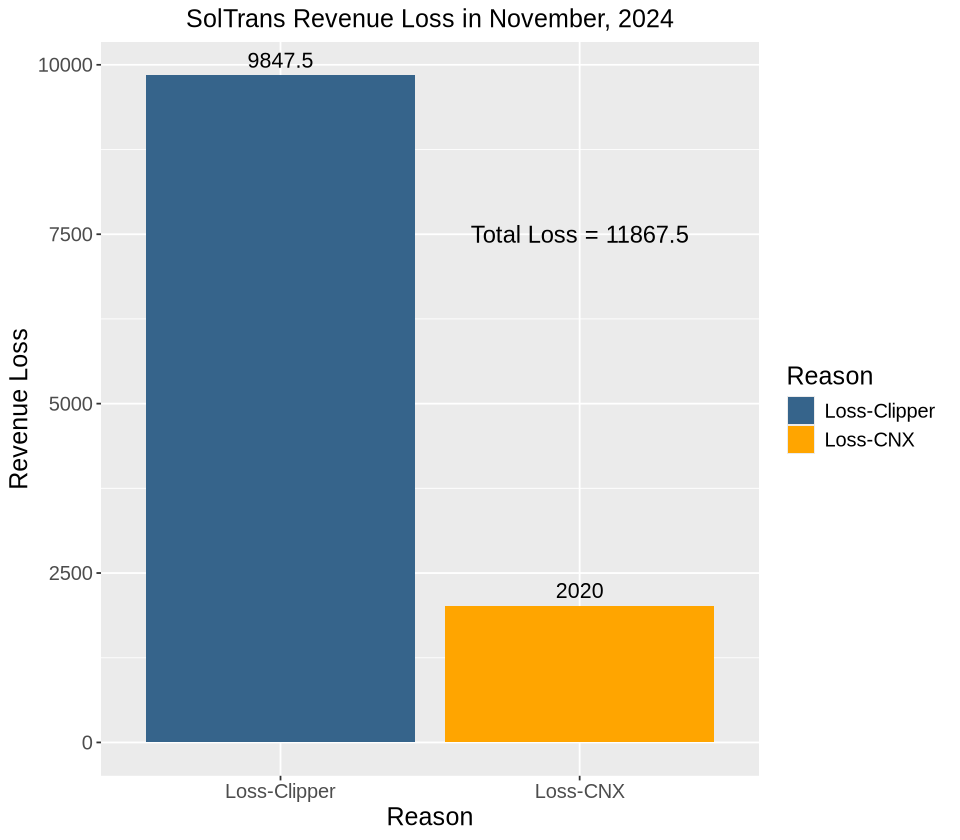

In [91]:
options(repr.plot.width = 8, repr.plot.height =7) 
X = SolTransTU_NovFareRevenue %>%
    filter(Route == "None") %>% 
    group_by(RouteID) %>% 
    summarise(Fares = sum(Fare)/100) 
X%>% 
    ggplot(aes(x = RouteID, y = Fares , fill = RouteID)) +
    geom_bar(stat = "identity") +
    ggtitle("SolTrans Revenue Loss in November, 2024") +
    ylab("Revenue Loss") +
    xlab("Reason")+
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    geom_text(
        aes(label=Fares), stat = "identity",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) +
    scale_fill_manual("Reason", values = c("Loss-Clipper" = "steelblue4", "Loss-CNX" = "orange")) +
    annotate("text", x=2, y=7500, label= paste0("Total Loss = ", sum(X$Fares)), size = 5)


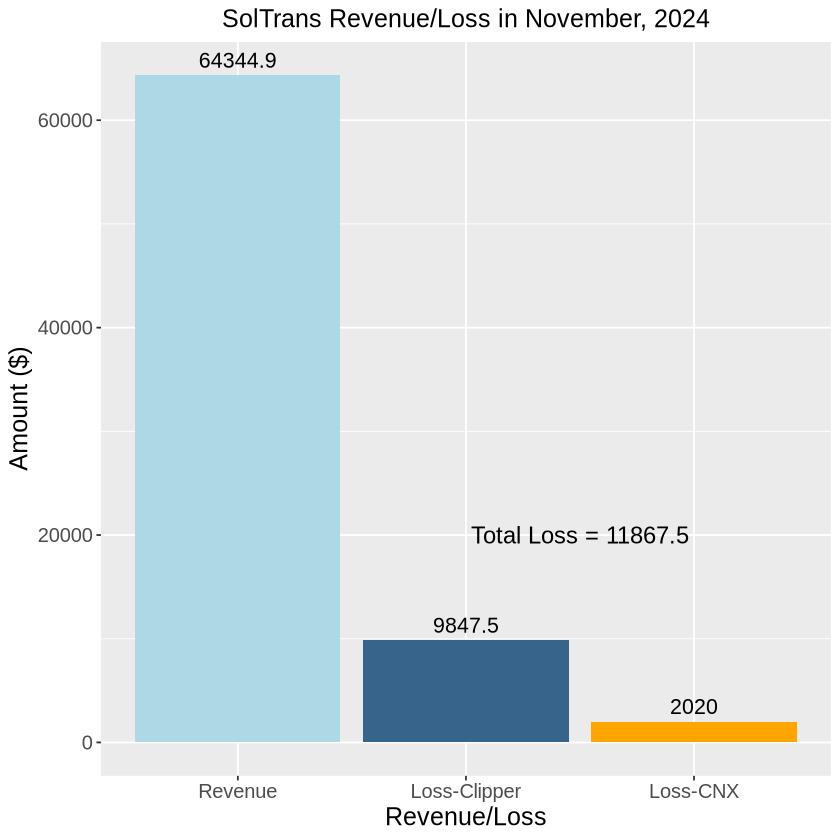

In [92]:
options(repr.plot.width = 7, repr.plot.height =7) 
X = SolTransTU_NovFareRevenue %>%
    filter(Route == "None") %>% 
    group_by(RouteID) %>% 
    summarise(Fares = sum(Fare)/100) %>% 
    add_row(RouteID = "Revenue", Fares = sum(Nov$purseAmount, na.rm = TRUE)/100)

X%>% 
    mutate(RouteID = factor(RouteID, levels = c("Revenue", "Loss-Clipper", "Loss-CNX"))) %>% 
    ggplot(aes(x = RouteID, y = Fares , fill = RouteID)) +
    geom_bar(stat = "identity") +
    ggtitle("SolTrans Revenue/Loss in November, 2024") +
    ylab("Amount ($)") +
    xlab("Revenue/Loss")+
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    geom_text(
        aes(label=Fares), stat = "identity",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) +
    scale_fill_manual("Reason", values = c("Revenue" = "lightblue", "Loss-Clipper" = "steelblue4", "Loss-CNX" = "orange")) +
    theme(legend.position = "none") +
    annotate("text", x=2.5, y=20000, label= paste0("Total Loss = ", sum(X$Fares[1], X$Fares[2])), size = 5)


In [93]:
sum(Nov$purseAmount, na.rm = TRUE)/100

[1] 64344.9

### Route-Specific Analysis

In [94]:
Route = read_csv("../fs_kit/data/DS_ROUTE_1.csv")
Route

Rows: 18 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Column1, Column2
dbl (1): ROUTE_ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ROUTE_ID Column1 Column2
1  414      1       1      
2  415      2       2      
3  416      3       3      
4  417      4       4      
5  418      5       5      
6  419      6       6      
7  420      7A      7A     
8  422      15      15     
9  423      17      17     
10 657      8       8      
11 740      Y       Yellow 
12 741      82      82     
13 780      38      38     
14 781      R       Red    
15 783      7B      7B     
16 816      G       Green  
17 817      B       Blue   
18 835      None    None

In [95]:
Route = Route %>% 
    mutate(RouteF = factor(Column2, levels = c("1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7A",
    "7B",
    "8",
    "15",
    "17",
    "38",
    "82",
    "Yellow",
    "Red",
    "Green",
    "Blue",
    "None")))                             
Route

ROUTE_ID Column1 Column2 RouteF
1  414      1       1       1     
2  415      2       2       2     
3  416      3       3       3     
4  417      4       4       4     
5  418      5       5       5     
6  419      6       6       6     
7  420      7A      7A      7A    
8  422      15      15      15    
9  423      17      17      17    
10 657      8       8       8     
11 740      Y       Yellow  Yellow
12 741      82      82      82    
13 780      38      38      38    
14 781      R       Red     Red   
15 783      7B      7B      7B    
16 816      G       Green   Green 
17 817      B       Blue    Blue  
18 835      None    None    None

In [96]:
NovFareRoute = Nov %>% 
    filter(recordType == 1) %>% 
    inner_join(Route, by = c("routeId" = "ROUTE_ID")) %>% 
    # mutate(RouteF = factor(Column2, levels = c("1",
    # "2",
    # "3",
    # "4",
    # "5",
    # "6",
    # "7A",
    # "7B",
    # "8",
    # "15",
    # "17",
    # "38",
    # "82",
    # "Yellow",
    # "Red",
    # "Green",
    # "Blue",
    # "None"))) %>%                             
    select(Date, Time, Bus, RouteF)
head(NovFareRoute)
dim(NovFareRoute)

Date       Time     Bus  RouteF
1 2024-11-01 02:45:00 5105 Blue  
2 2024-11-01 02:48:00 5105 Blue  
3 2024-11-01 02:49:00 5105 Blue  
4 2024-11-01 02:50:00 5105 Blue  
5 2024-11-01 02:53:00 5105 Blue  
6 2024-11-01 02:55:00 5118 Green

[1] 23158     4

In [97]:
NovFareRoute %>% 
    count(RouteF) %>% 
    right_join(Route) %>% 
    replace_na(list(n = 0)) %>% 
    select(RouteF, n) %>% 
    arrange(RouteF)


Joining with `by = join_by(RouteF)`


RouteF n   
1  1       593
2  2       704
3  3       447
4  4       444
5  5       504
6  6       326
7  7A      715
8  7B      882
9  8       439
10 15        1
11 17        0
12 38       10
13 82      759
14 Yellow 1360
15 Red    8262
16 Green  2046
17 Blue   1833
18 None   3833

Joining with `by = join_by(RouteF)`


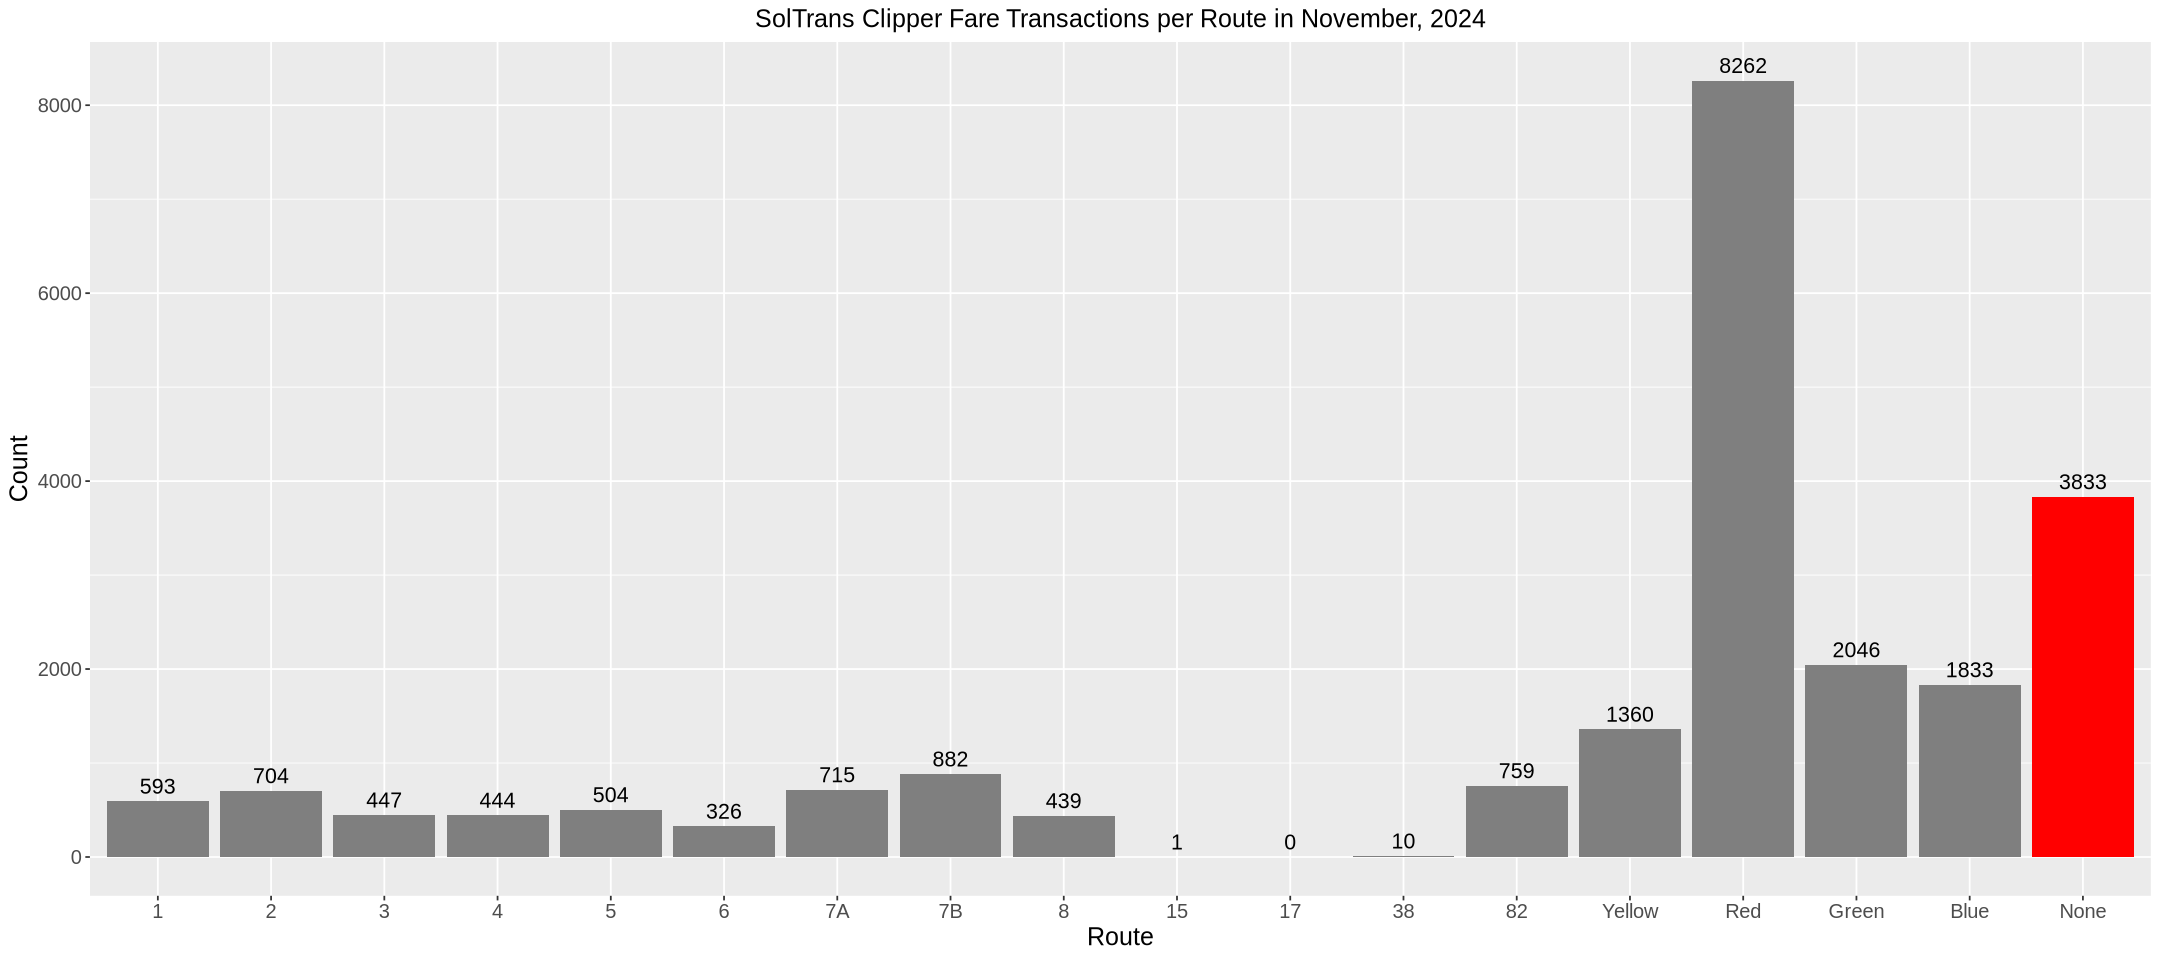

In [98]:
options(repr.plot.width = 18, repr.plot.height =8) 
NovFareRoute %>% 
    count(RouteF) %>% 
    right_join(Route) %>% 
    replace_na(list(n = 0)) %>% 
    select(RouteF, n) %>% 
    arrange(RouteF) %>% 
    ggplot(aes(x = RouteF, y = n, fill = RouteF)) +
    geom_bar(stat = "identity") +
    ggtitle("SolTrans Clipper Fare Transactions per Route in November, 2024") +
    ylab("Count") +
    xlab("Route")+
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    geom_text(
        aes(label=n), stat = "identity",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) +
    scale_fill_manual("Route", values = c("None" = "red")) +
    theme(legend.position = "none")


In [99]:
SolTransTU_NovFareRoute = SolTransTU %>% 
    select(-trip_id) %>% 
    distinct() %>% 
    mutate(Reason = "Clipper") %>% 
    right_join(NovFareRoute) %>% 
    replace_na(list(Reason = "CNX"))  %>% 
    mutate(RouteID = ifelse(RouteF != "None", as.character(RouteF), paste0(as.character(RouteF),"-",Reason)))
head(SolTransTU_NovFareRoute)
dim(SolTransTU_NovFareRoute)

Joining with `by = join_by(Date, Time, Bus)`


Date       Time     Bus  Reason  RouteF RouteID
1 2024-11-01 05:42:00 3910 Clipper 7A     7A     
2 2024-11-01 05:50:00 3910 Clipper 7A     7A     
3 2024-11-01 06:06:00 3910 Clipper 7A     7A     
4 2024-11-01 06:42:00 3910 Clipper 7A     7A     
5 2024-11-01 08:28:00 3910 Clipper 7A     7A     
6 2024-11-01 08:34:00 3910 Clipper 7A     7A

[1] 23158     6

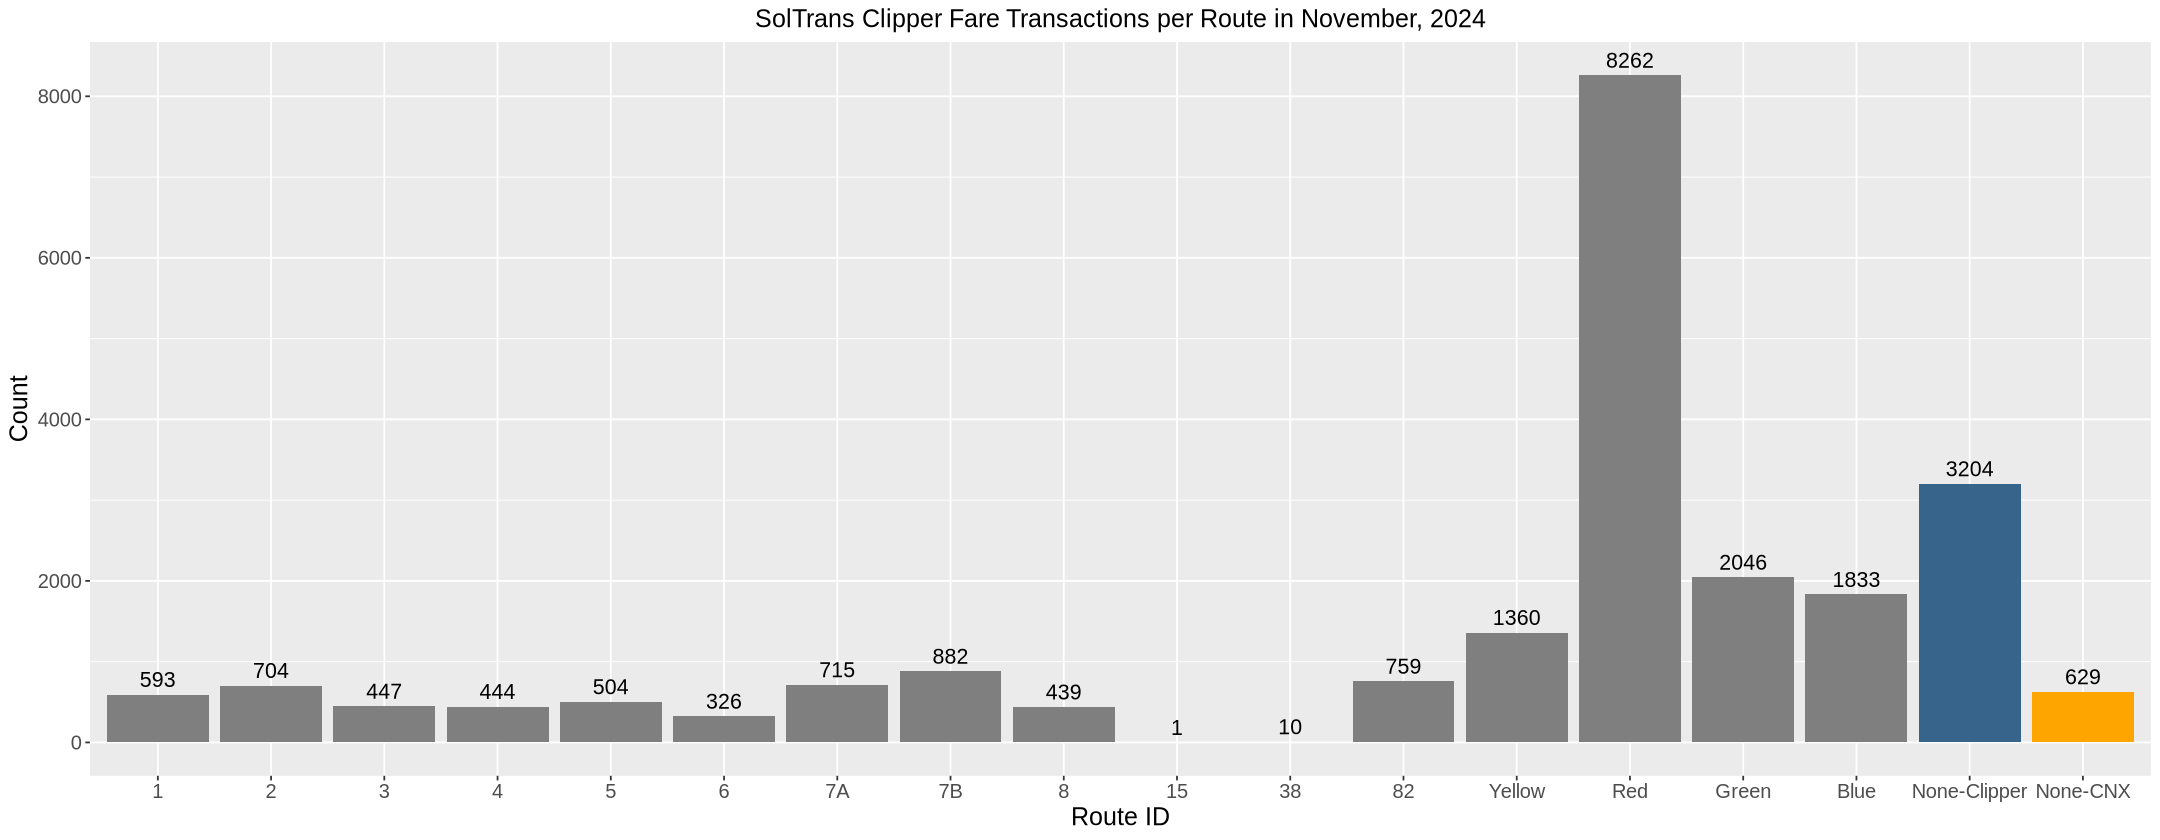

In [100]:
options(repr.plot.width = 18, repr.plot.height =7) 
SolTransTU_NovFareRoute %>% 
    mutate(RouteID = factor(RouteID, levels = c(levels(RouteF), "None-Clipper", "None-CNX"))) %>% 
    ggplot(aes(x = RouteID , fill = RouteID)) +
    geom_bar() +
    ggtitle("SolTrans Clipper Fare Transactions per Route in November, 2024") +
    ylab("Count") +
    xlab("Route ID")+
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    geom_text(
        aes(label=..count..), stat = "count",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) +
    scale_fill_manual("RouteID", values = c("None-Clipper" = "steelblue4", "None-CNX" = "orange")) +
    theme(legend.position = "none")


In [102]:
ecash = read_csv("Copy of Clipper Ecash 2020-2025.csv")

Rows: 57 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Month
num (1): Revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [104]:
ecash

Month  Revenue 
1  Jul-20 25813.42
2  Aug-20 25915.51
3  Sep-20 20902.46
4  Oct-20 29671.14
5  Nov-20 24966.41
6  Dec-20 22083.98
7  Jan-21 21595.74
8  Feb-21 21692.76
9  Mar-21 50695.14
10 Apr-21 28409.39
11 May-21 30905.10
12 Jun-21 30463.93
13 Jul-21 36731.63
14 Aug-21 40471.49
15 Sep-21 34349.13
16 Oct-21 43881.32
17 Nov-21 39666.59
18 Dec-21 32033.06
19 Jan-22 36012.81
20 Feb-22 36407.83
21 Mar-22 34260.00
22 Apr-22 59126.79
23 May-22 55378.44
24 Jun-22 46619.82
25 Jul-22 59875.83
26 Aug-22 57838.75
27 Sep-22 49070.09
28 Oct-22 67015.32
29 Nov-22 52826.62
30 Dec-22 56495.93
31 Jan-23 48697.64
32 Feb-23 49917.56
33 Mar-23 74948.06
34 Apr-23 67116.85
35 May-23 70938.40
36 Jun-23 65951.02
37 Jul-23 63847.25
38 Aug-23 71804.77
39 Sep-23 30256.76
40 Oct-23 71494.40
41 Nov-23 52840.79
42 Dec-23 60740.98
43 Jan-24 58933.58
44 Feb-24 53653.91
45 Mar-24 71980.48
46 Apr-24 50599.33
47 May-24 54194.50
48 Jun-24 81299.00
49 Jul-24 56658.63
50 Aug-24 47852.67
51 Sep-24 70810.26
52 Oct-24 54706.07
53 Nov-24 53392.79
54 Dec-24 74793.05
55 Jan-25 38278.64
56 Feb-25 43596.21
57 Mar-25 28391.73

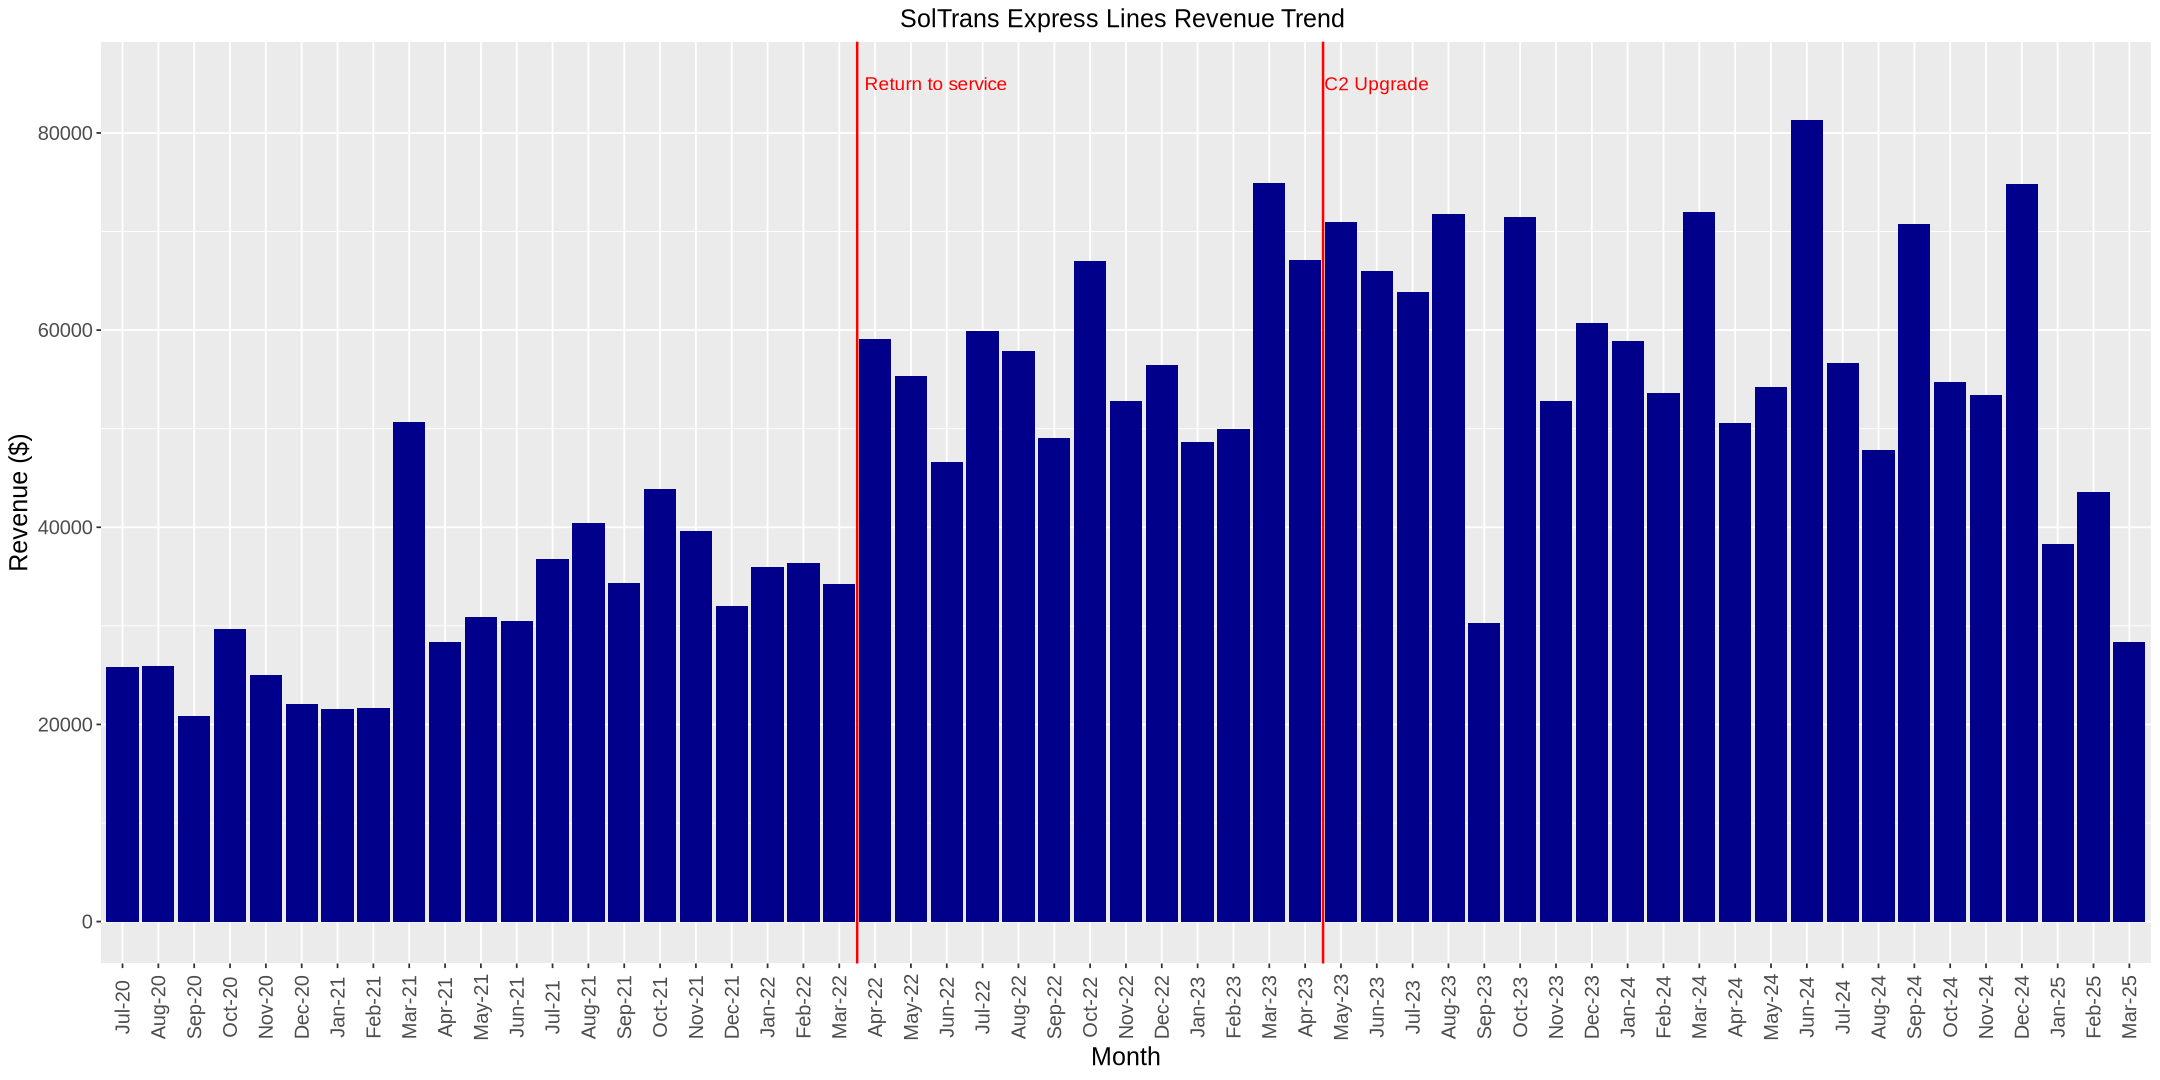

In [141]:
options(repr.plot.width = 18, repr.plot.height =9) 
ecash %>% 
    ggplot(aes(factor(Month, levels = unique(Month)), Revenue)) +
    geom_bar(stat = "identity", fill = "darkblue") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
    theme(plot.title = element_text(hjust = 0.5, size = 17)) +
    theme(text = element_text(size = 15),axis.text.x = element_text(hjust = 0.5)) + 
    ggtitle("SolTrans Express Lines Revenue Trend ") +
    ylab("Revenue ($)") +
    xlab("Month") +
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    geom_vline(xintercept = 21.5, color = "red", linewidth = .7) +
    annotate("text", x=23.7, y=85000, label= paste0("Return to service"), size = 4, color = "red") +
    geom_vline(xintercept = 34.5, color = "red", linewidth = .7) +
    annotate("text", x=36, y=85000, label= paste0("C2 Upgrade"), size = 4, color = "red") 



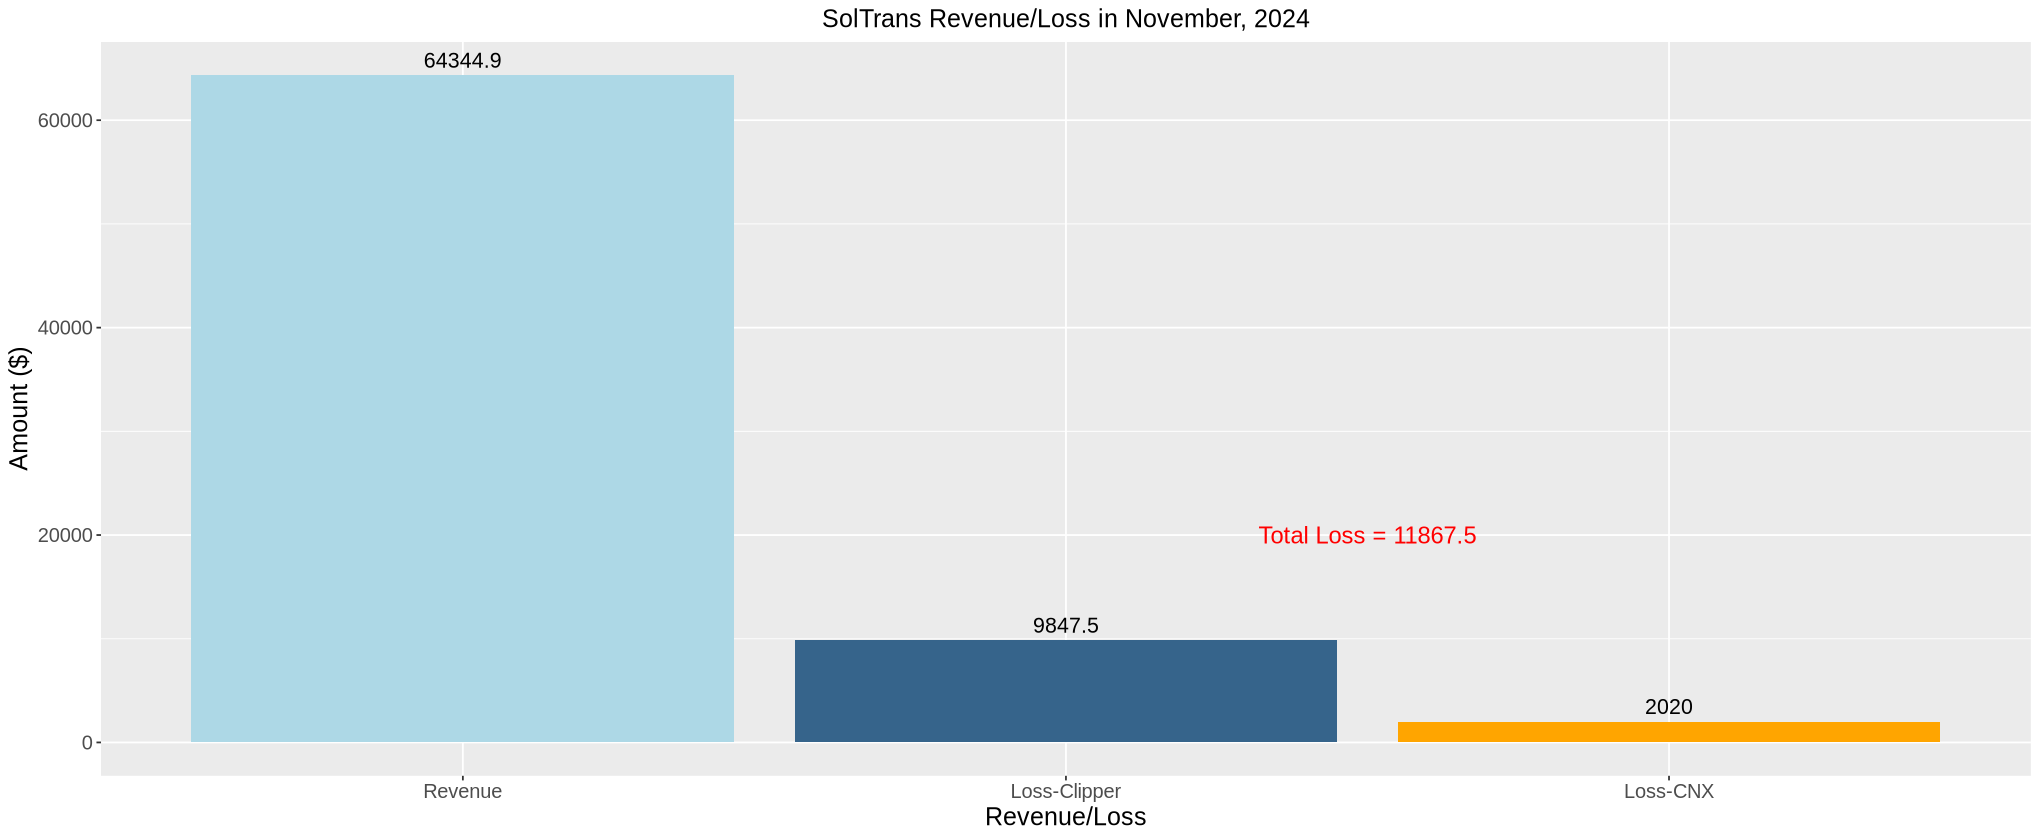

In [108]:
#### options(repr.plot.width = 6, repr.plot.height =5.5) 
X = SolTransTU_NovFareRevenue %>%
    filter(Route == "None") %>% 
    group_by(RouteID) %>% 
    summarise(Fares = sum(Fare)/100) %>% 
    add_row(RouteID = "Revenue", Fares = sum(Nov$purseAmount, na.rm = TRUE)/100)

X%>% 
    mutate(RouteID = factor(RouteID, levels = c("Revenue", "Loss-Clipper", "Loss-CNX"))) %>% 
    ggplot(aes(x = RouteID, y = Fares , fill = RouteID)) +
    geom_bar(stat = "identity") +
    ggtitle("SolTrans Revenue/Loss in November, 2024") +
    ylab("Amount ($)") +
    xlab("Revenue/Loss")+
    theme(plot.title = element_text(hjust = 0.5, size = 15)) +
    geom_text(
        aes(label=Fares), stat = "identity",
        size = 4.5,
        position = position_dodge(0.9),
        vjust = -.5) +
    theme(text = element_text(size = 15),
        axis.text.x = element_text(hjust = 0.5)) +
    scale_fill_manual("Reason", values = c("Revenue" = "lightblue", "Loss-Clipper" = "steelblue4", "Loss-CNX" = "orange")) +
    theme(legend.position = "none") +
    annotate("text", x=2.5, y=20000, label= paste0("Total Loss = ", sum(X$Fares[1], X$Fares[2])), size = 5, color = "red")
